# Fetch Data Analyst Take-Home Challenge

## Introduction

First and foremost, thank you for the opportunity to be considered for the data analyst role at Fetch.

The following notebook will be my solution to the take home challenge including all exercises. This is intended not only as a solution to the provided questions, but a roadmap to the analytical process I took in gaining familiarity, addressing the given questions, and looking for potential areas for insight.

# Exercise 1. Intro

**Key Questions:**

1. Are there any data quality issues present?
2. Are there any fields that are challenging to understand?

Additionally, I will consider some other interesting avenues for data analysis and preparing an understanding for the rest of the take home.

## Overview

To perform the analysis, the approach will be formatted in the following way:

1. **Key Question 1.**
    * Initial examination of provided data (Users, Transactions, Products)
    * Check structure, number of observations, features
    * Standard Checks: Missing values, Duplicates, Unexpected data types
    * Distribution for Anomalies
    * Accompanying Visualizations to check distributions and possible inconsistencies
    * Conclusion
2. **Key Question 2.**
    * Field Clarity
    * Necessary Assumptions


# Exercise 1: Key Question 1.

Q: *Are there any data quality issues present?*

To address this question, we will take a comprehensive deep dive into the provided datasets. To maintain an analytical narrative, we will handle one dataset at a time. Athough sometimes departing from this standard where necessary, this analytical narrative will primarily follow traditional data integrity analysis methods including checking missing values, duplicates, distribution, etc.

In [5]:
# Load Data
import pandas as pd

Products = pd.read_csv("C:/Users/19152/Downloads/PRODUCTS_TAKEHOME.csv")
Transactions = pd.read_csv("C:/Users/19152/Downloads/TRANSACTION_TAKEHOME.csv")
Users = pd.read_csv("C:/Users/19152/Downloads/USER_TAKEHOME.csv")

## Products

### Overview

In [6]:
# Quick Look at the Data
Products

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
...,...,...,...,...,...,...,...
845547,Health & Wellness,Topical Muscle & Joint Relief Treatments,Braces & Wraps,NaN,NaN,NaN,7.223016e+11
845548,Snacks,Cookies,NaN,NaN,"TREEHOUSE FOODS, INC.",LOFTHOUSE,4.182082e+10
845549,Snacks,Candy,Confection Candy,NaN,HARIBO GMBH & CO KG,HARIBO,1.001672e+11
845550,Snacks,Nuts & Seeds,Hazelnuts,NaN,DOUBLE-COLA CO,JUMBO,7.539076e+10


In [7]:
# Overview of the Data, including missing values
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


Here we can see there are 845,552 products listed with the 7 features: 
* CATEGORY_1
* CATEGORY_2
* CATEGORY_3
* CATEGORY_4
* MANUFACTURER
* BRAND
* BARCODE

We will assume this data is a subset of the Products Fetch has registered for rewards.

Categories 1 through 4 appear to be more specific classifications of the previous category, where 1 is the most general and 4 is the most specific. Immediately we can see there are a large number of CATEGORY_4 missing, this will be further explored.

An issue present is the Dtype associated with barcode should be an integer, not a float, we will address this now.

In [8]:
# Coerce 'BARCODE' to Integer
Products['BARCODE'] = Products['BARCODE'].astype('Int64')

### Missing Values

In [9]:
# Calculate the total number of missing values per column
missing_values = Products.isnull().sum()

# Calculate the percentage of missing values per column
missing_percentage = (missing_values / len(Products)) * 100

# Combine the results into a dataframe for clarity
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Filter out columns without missing data
missing_data = missing_data[missing_data['Missing Values'] > 0]

# Sort by the percentage of missing data in descending order
missing_data = missing_data.sort_values(by='Percentage', ascending=False)

# Display the dataframe
print(missing_data)

              Missing Values  Percentage
CATEGORY_4            778093   92.021898
MANUFACTURER          226474   26.784160
BRAND                 226472   26.783923
CATEGORY_3             60566    7.162895
BARCODE                 4025    0.476020
CATEGORY_2              1424    0.168411
CATEGORY_1               111    0.013128


**CATEGORY_4:**

Given the number of missing values, I would be hesitant to utilize CATEGORY_4 for any inference directly without some further consideration.

The "CATEGORY_#" features increase resolution as the number increases, causing few products to have some extra depth where it may matter.

Given this information may actually be important for understanding the product, I wouldn't be so quick to delete the column despite the high proportion of missing data. Imputation doesn't seem to be possible as replacing the missing values with most probable category based on other observations is unlikely to be accurate given each entry is supposed to be somewhat unique. I will leave this untouched as I believe the information in the CATEGORY features are valuable, although I wouldn't use CATEGORY_4 for inference.

**BARCODE:**

In the context of the problem, as a primary key and foreign key (Transactions data), missing data can be problematic. Preferrably we would like BARCODE to be available as this can cause operational and analytical issues. During further analysis, we will need to ensure that missing BARCODEs doesn't inadvertantly merge on another missing BARCODE that may be unrelated. This could be addressed by verifying the BARCODE with partner companies of Fetch Rewards when organizing deals.

**Manufacturer/Brand:**

There seems to be a similar number of missing values in both Manufacturer and Brand, we can assume that this is due to information on one determines the other. We can verify that columns with missing Manufacturer also have missing Brand.

In [10]:
# Calculate percent of missing Brand that have missing Manufacturer
missing_brand = Products[Products['BRAND'].isnull()]
missing_brand_manufacturer = missing_brand[missing_brand['MANUFACTURER'].isnull()]
percent_missing_brand_manufacturer = (len(missing_brand_manufacturer) / len(missing_brand)) * 100
print(percent_missing_brand_manufacturer)


100.0


### Duplicates

In [11]:
# Identify and keep all duplicate BARCODEs (excluding missing values)
duplicate_barcodes = Products[Products['BARCODE'].notna() & Products['BARCODE'].duplicated(keep=False)]
# Check for entirely duplicate rows
duplicate_rows = Products[Products.duplicated(keep=False)]
Products.drop(duplicate_rows.index, inplace=True)
# Sort duplicate_barcodes by BARCODE
duplicate_barcodes.sort_values(by='BARCODE')


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
99568,Snacks,Candy,Confection Candy,NaN,MARS WRIGLEY,STARBURST,400510
349945,Snacks,Candy,Confection Candy,NaN,MARS WRIGLEY,STARBURST,400510
841230,Snacks,Candy,Chocolate Candy,NaN,MARS WRIGLEY,M&M'S,404310
139121,Snacks,Candy,Chocolate Candy,NaN,PLACEHOLDER MANUFACTURER,BRAND NOT KNOWN,404310
274321,Snacks,Crackers,Graham Crackers,NaN,TRADER JOE'S,TRADER JOE'S,438711
...,...,...,...,...,...,...,...
708466,Snacks,Candy,Mints,NaN,LOTUS BRANDS INC,ECO-DENT,360054002
304021,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,GÖT2B,17000329260
213340,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,SCHWARZKOPF,17000329260
709607,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,GÖT2B,52336919068


There are some duplicate rows and entries that share barcode. When merging two datasets on this as a key, there may be complications, but it is unclear whether barcode is a unique identifier. There are some situations where having the same barcode, but slightly different variations of a product, may make sense. I will delete the duplicate rows, but will need to do further research/discussion. We should be careful when joining on barcode as a key though as duplicates can cause unintenional complications.

### Distributions


Value Counts and Percentages for CATEGORY_1:
Health & Wellness: 512679 (60.66%)
Snacks: 324471 (38.39%)
Beverages: 3988 (0.47%)
Pantry: 869 (0.10%)
Apparel & Accessories: 846 (0.10%)
Dairy: 602 (0.07%)
Needs Review: 547 (0.06%)
Alcohol: 501 (0.06%)
Home & Garden: 115 (0.01%)
Deli & Bakery: 69 (0.01%)


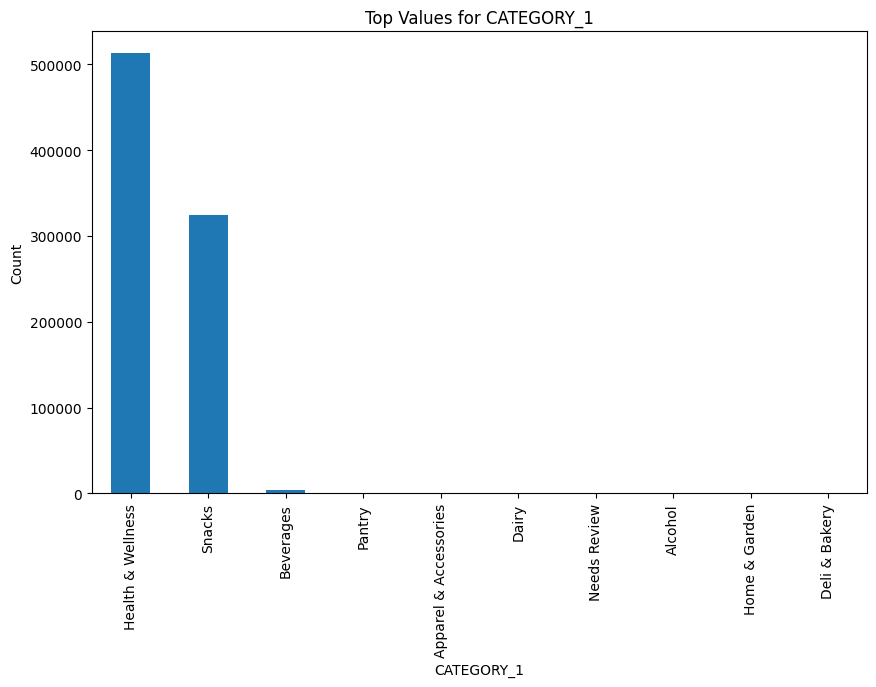


Value Counts and Percentages for CATEGORY_2:
Candy: 120760 (14.29%)
Hair Care: 111482 (13.19%)
Medicines & Treatments: 99112 (11.73%)
Bath & Body: 81469 (9.64%)
Skin Care: 62581 (7.40%)
Nuts & Seeds: 33512 (3.97%)
Cookies: 30418 (3.60%)
Eye Care: 25017 (2.96%)
Chips: 23723 (2.81%)
Oral Care: 22514 (2.66%)


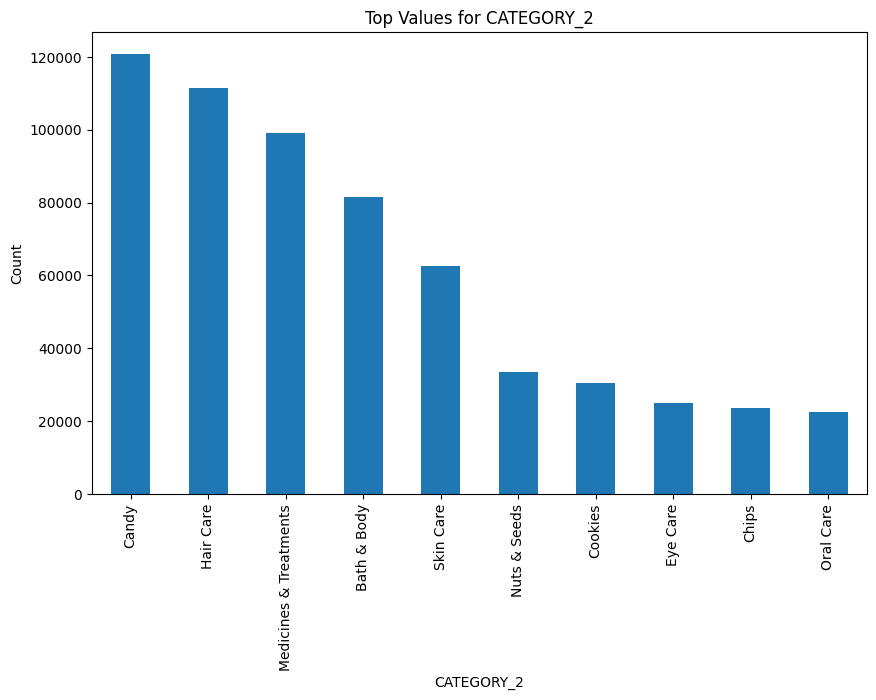


Value Counts and Percentages for CATEGORY_3:
Confection Candy: 56937 (6.74%)
Vitamins & Herbal Supplements: 55697 (6.59%)
Chocolate Candy: 47550 (5.63%)
Hair Styling Products: 20450 (2.42%)
Reading Glasses: 20394 (2.41%)
Hand & Body Lotions: 18793 (2.22%)
Shampoo: 17722 (2.10%)
Conditioner: 17183 (2.03%)
Hair Care Accessories: 16754 (1.98%)
Braces & Wraps: 15203 (1.80%)


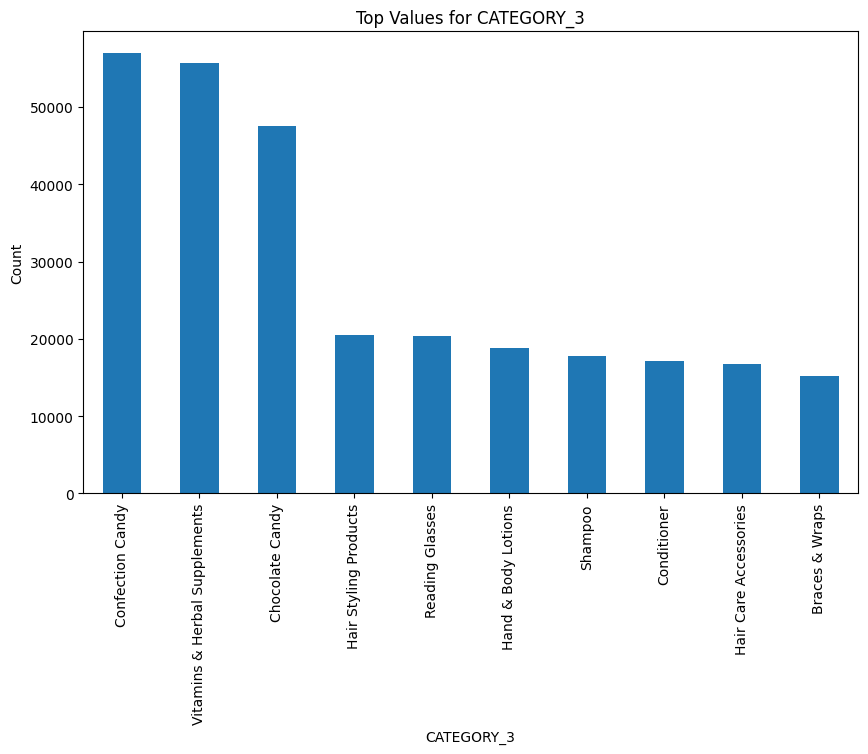


Value Counts and Percentages for CATEGORY_4:
Lip Balms: 9737 (1.15%)
Already Popped Popcorn: 6974 (0.83%)
Sleep Aids: 4978 (0.59%)
Hair Brushes & Combs: 4724 (0.56%)
Women's Shaving Gel & Cream: 3874 (0.46%)
Men's Razors: 2840 (0.34%)
Heartburn & Antacids Medicines & Treatments: 2756 (0.33%)
Constipation Relief Medicines & Treatments: 2739 (0.32%)
Immune Support: 2682 (0.32%)
Microwave Popcorn: 2313 (0.27%)


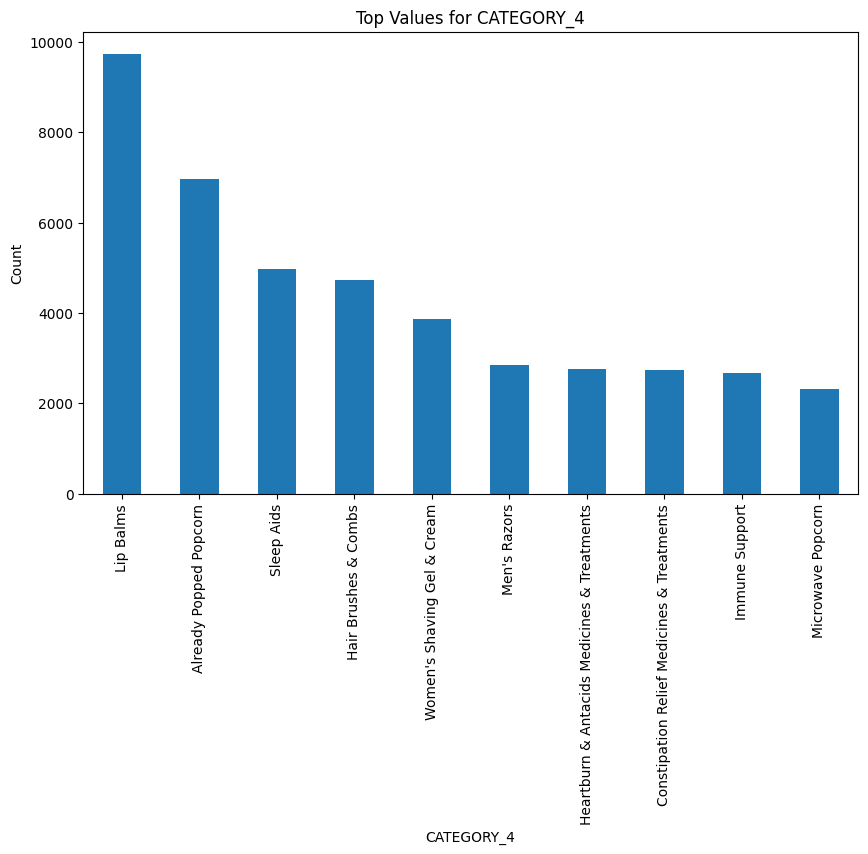


Value Counts and Percentages for MANUFACTURER:
PLACEHOLDER MANUFACTURER: 86898 (10.28%)
PROCTER & GAMBLE: 21065 (2.49%)
REM MANUFACTURER: 20813 (2.46%)
UNILEVER: 16864 (2.00%)
L'OREAL: 16699 (1.98%)
PEPSICO: 14459 (1.71%)
JOHNSON & JOHNSON: 10443 (1.24%)
THE HERSHEY COMPANY: 10008 (1.18%)
MARS WRIGLEY: 9726 (1.15%)
MONDELĒZ INTERNATIONAL: 7248 (0.86%)


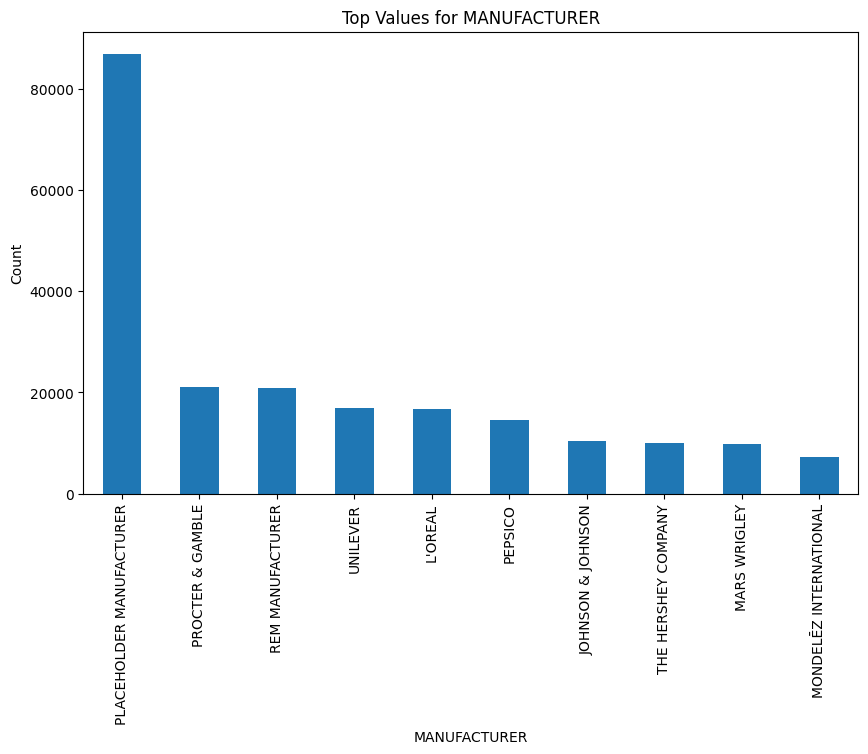


Value Counts and Percentages for BRAND:
REM BRAND: 20813 (2.46%)
BRAND NOT KNOWN: 17021 (2.01%)
PRIVATE LABEL: 13467 (1.59%)
CVS: 6400 (0.76%)
SEGO: 4831 (0.57%)
MEIJER: 4050 (0.48%)
DOVE: 3857 (0.46%)
RITE AID: 3238 (0.38%)
MATRIX: 2958 (0.35%)
EQUATE: 2946 (0.35%)


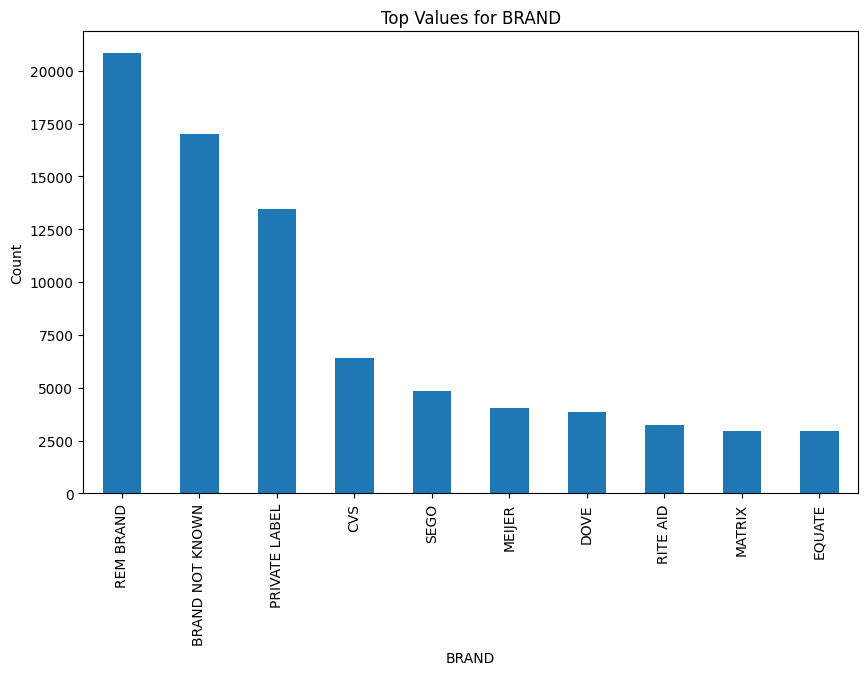


Distribution for BARCODE:


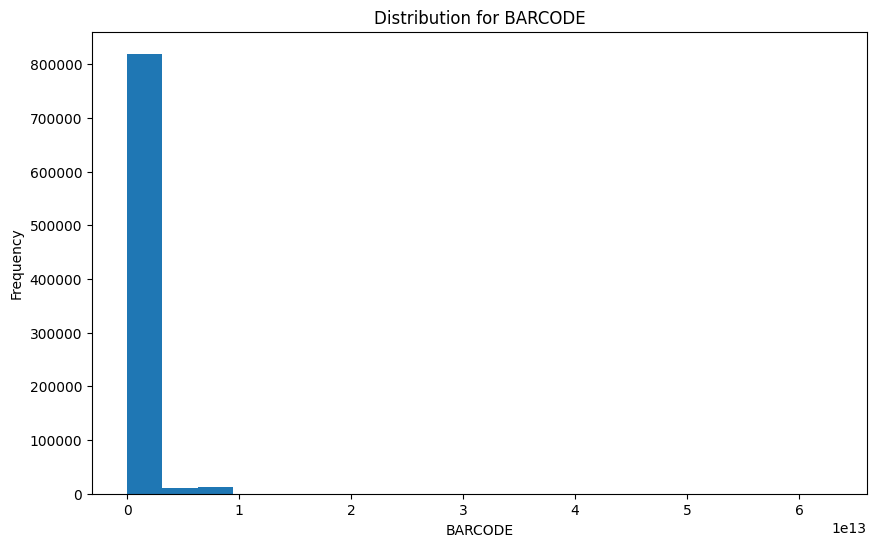

In [12]:
import matplotlib.pyplot as plt
# Visualize Categorical Columns
for col in Products.select_dtypes(include=['object']).columns:
    print(f"\nValue Counts and Percentages for {col}:")
    value_counts = Products[col].value_counts()
    top_values = value_counts.head(10)
    top_percentages = (top_values / len(Products)) * 100
    for category, count, pct in zip(top_values.index, top_values, top_percentages):
        print(f"{category}: {count} ({pct:.2f}%)")
    top_values.plot(kind='bar', title=f"Top Values for {col}", figsize=(10, 6))
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Visualize Numerical Columns
for col in Products.select_dtypes(include=['int64', 'float64']).columns:
    print(f"\nDistribution for {col}:")
    Products[col].plot(kind='hist', bins=20, title=f"Distribution for {col}", figsize=(10, 6))
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

**Insight:** Immediately we see the majority of the data, a whopping ~99%, belongs to the 'Health & Wellness'and 'Snacks' CATEGORY_1. This may be important in the future, especially in inference or any business insights. If these two categories are organically the dominating categories, this could directly be used for analysis. If these two categories were the primary query for this dataset, we can then make inferences on these types of products specifically.

In Manufacturer there is a 'PLACEHOLDER_MANUFACTURER' which dominates at 10% of manufacturers. Immediately it is not clear if this placeholder is similar to a missing value. The same could also be said for the Brands labeled 'PRIVATE LABEL','BRAND NEEDS REVIEW', and 'BRAND NOT KNOWN'. 

## Transactions


### Overview

In [13]:
Transactions

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,
...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08.634 Z,TARGET,6154bcf098f885648de2f299,8.523911e+10,2.00,1.18
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56.736 Z,STOP & SHOP,60aa809f188b926b2244c974,4.610040e+10,1.00,2.00
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25.816 Z,WALMART,60bd26e83dc3b13a15c5f4e7,6.466300e+11,1.00,20.96
49998,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18,2024-06-18 19:57:32.211 Z,MARKET BASKET,6169912fac47744405af62b7,4.180050e+10,1.00,3.00


In [14]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


With 50,000 transactions and 8 columns, the Transactions dataset lists user's transactions on the app through scanning their receipts.
The 8 features include:
* RECEIPT_ID
* PURCHASE_DATE
* SCAN_DATE
* STORE_NAME
* USER_ID
* BARCODE
* FINAL_QUANTITY
* FINAL_SALE

Immediately we see some issues, namely Dtypes of BARCODE, FINAL_QUANTITY, FINAL_SALE, PURCHASE_DATE, and SCAN_DATE. They are not the proper data types we expect, but this can be fixed.

In [15]:
# Coerce 'BARCODE' to Integer
Transactions['BARCODE'] = Transactions['BARCODE'].astype('Int64')

# Coerce 'PURCHASE_DATE' & 'SCAN_DATE' to datetime
Transactions['PURCHASE_DATE'] = pd.to_datetime(Transactions['PURCHASE_DATE'])
Transactions['SCAN_DATE'] = pd.to_datetime(Transactions['SCAN_DATE'])

Attempting to coerce FINAL_QUANTITY and FINAL_SALE to numerics reveal some type inconsistencies. Before we can coerce these types, we will need to handle a deeper issue.

### Duplicates
The FINAL_QUANTITY and FINAL_QUANTITY columns have some deeper issues associated. Let's dig deeper into this.

In [16]:
# Calculate number of duplciated RECEIPT_IDs
duplicate_receipts = Transactions[Transactions.duplicated(subset='RECEIPT_ID', keep=False)]
len(duplicate_receipts)

50000

It would seem every RECEIPT_ID is duplicated, although we would expect these to be unique identifiers with the exception of multiple BARCODEs on a receipt. Below, taking a look at a few of the entries, we can see duplicate entries defined by their matching RECEIPT_ID and BARCODE.

In [17]:
# Show example duplicate receipts sorted by RECEIPT_ID
duplicate_receipts.sort_values(by='RECEIPT_ID')

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539000+00:00,WALMART,63b73a7f3d310dceeabd4758,15300014978,1.00,
41567,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539000+00:00,WALMART,63b73a7f3d310dceeabd4758,15300014978,1.00,1.54
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206000+00:00,ALDI,62c08877baa38d1a1f6c211a,<NA>,zero,1.49
39291,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206000+00:00,ALDI,62c08877baa38d1a1f6c211a,<NA>,1.00,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813000+00:00,WALMART,60842f207ac8b7729e472020,78742229751,1.00,
...,...,...,...,...,...,...,...,...
28152,fffbb112-3cc5-47c2-b014-08db2f87e0c7,2024-07-30,2024-08-04 11:43:31.474000+00:00,WALMART,5eb59d6be7012d13941af5e2,818000020115,1.00,4.88
24998,fffbfb2a-7c1f-41c9-a5da-628fa7fcc746,2024-07-28,2024-07-28 11:47:34.180000+00:00,WALMART,62a0c8f7d966665570351bb8,13000009546,1.00,
31602,fffbfb2a-7c1f-41c9-a5da-628fa7fcc746,2024-07-28,2024-07-28 11:47:34.180000+00:00,WALMART,62a0c8f7d966665570351bb8,13000009546,1.00,3.48
25233,fffe8012-7dcf-4d84-b6c6-feaacab5074a,2024-09-07,2024-09-08 08:21:25.648000+00:00,WALGREENS,5f53c62bd683c715b9991b20,74323095777,2.00,2.98


Looking at the above table, by sorting by RECEIPT_ID, we can observe obvious duplicates denoted by their also identical BARCODE. If these were two items, we would expect the FINAL_QUANTITY to be 2. This FINAL_QUANTITY field is already ambiguous, but this we will assume is not two items being seperated somehow, but one item being duplicated.

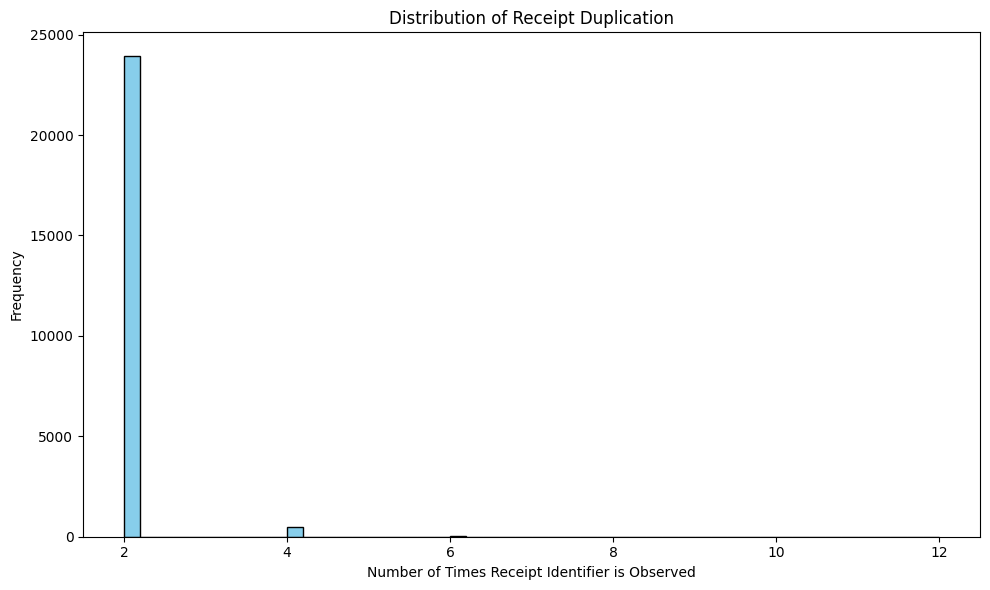

In [18]:
# Plot distribution of number of times a RECEIPT_ID is duplicated
receipt_counts = Transactions['RECEIPT_ID'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(receipt_counts, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Receipt Duplication")
plt.xlabel("Number of Times Receipt Identifier is Observed")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Reinforcing our observation, again we see number of times a RECEIPT_ID appears is only in multiples of 2 which is highly unlikely.

Continuing, let's look at some of the most duplicated RECEIPT_IDs and their respective data.

In [19]:
# View most duplicated RECEIPT_IDs and their respective data
top_receipts = receipt_counts[receipt_counts > 4]
top_receipts = Transactions[Transactions['RECEIPT_ID'].isin(top_receipts.index)]
top_receipts.sort_values(by='RECEIPT_ID')


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
1518,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,36200002179,1.00,
40776,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,36200002179,1.00,4.78
45747,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,41789001666,1.00,0.50
36819,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,78742012285,1.00,1.42
1520,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,78742012285,1.00,
...,...,...,...,...,...,...,...,...
43601,f1808dd8-868b-4745-ad53-4178ef5fa1f8,2024-07-25,2024-07-25 10:07:45.377000+00:00,ALDI,604278958fe03212b47e657b,<NA>,1.00,4.99
23561,f1808dd8-868b-4745-ad53-4178ef5fa1f8,2024-07-25,2024-07-25 10:07:45.377000+00:00,ALDI,604278958fe03212b47e657b,<NA>,zero,4.99
43650,f1808dd8-868b-4745-ad53-4178ef5fa1f8,2024-07-25,2024-07-25 10:07:45.377000+00:00,ALDI,604278958fe03212b47e657b,<NA>,1.00,1.55
23562,f1808dd8-868b-4745-ad53-4178ef5fa1f8,2024-07-25,2024-07-25 10:07:45.377000+00:00,ALDI,604278958fe03212b47e657b,<NA>,1.00,


In [20]:
# Example rows for a duplicated RECEIPT_ID
Transactions[Transactions['RECEIPT_ID'] == '0fb89572-c817-47e2-bd11-6f467baacbb2']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
1518,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,36200002179,1.00,
1519,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,41789001666,zero,0.50
1520,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,78742012285,1.00,
36819,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,78742012285,1.00,1.42
40776,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,36200002179,1.00,4.78
45747,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,41789001666,1.00,0.50


Although there are duplicate RECEIPT_IDs, it is important to note that they are not necessarily unique as some receipts may have multiple items. For this reason we cannot simply only keep 1 copy of each RECEIPT_ID, we will additionally need to check for duplicate barcodes. Three out of six of the items in the list immediately above appear to be correct whereas the rest seem to be erroneous data distinguished by either the 'zero' or empty data in either FINAL_QUANITY or FINAL_SALE. There are two copies of each entry, one correct, and another erroneous, denoted by the wrong Dtype (i.e. 'zero' or '') or 0.00.

Before we implement or attempt any solution, let's verify this assumption by checking what percent of duplicate entries (BARCODE and RECEIPT_ID) have one copy of correct dtype, while the other has some issue ('zero' or '').

In [21]:
# Define validity check
def is_valid(value):
    try:
        return float(value) > 0
    except (ValueError, TypeError):
        return False

# Check validity for all rows
Transactions['FINAL_QUANTITY_VALID'] = Transactions['FINAL_QUANTITY'].apply(is_valid)
Transactions['FINAL_SALE_VALID'] = Transactions['FINAL_SALE'].apply(is_valid)
# Get all invalid entries (either FINAL_QUANTITY or FINAL_SALE is invalid)
invalid_data = Transactions[
    ~Transactions['FINAL_QUANTITY_VALID'] |
    ~Transactions['FINAL_SALE_VALID']
]

# Display results
print("Entries with invalid data:")
print(invalid_data[['RECEIPT_ID', 'BARCODE', 'FINAL_QUANTITY', 'FINAL_SALE']])
# Identify duplicates
duplicates = Transactions[Transactions.duplicated(subset=['RECEIPT_ID', 'BARCODE'], keep=False)]

# Check validity for duplicates
duplicates['FINAL_QUANTITY_VALID'] = duplicates['FINAL_QUANTITY'].apply(is_valid)
duplicates['FINAL_SALE_VALID'] = duplicates['FINAL_SALE'].apply(is_valid)

# Filter invalid duplicates
invalid_duplicates = duplicates[
    ~duplicates['FINAL_QUANTITY_VALID'] |
    ~duplicates['FINAL_SALE_VALID']
]

# Display results
print("Duplicate entries with invalid data:")
print(invalid_duplicates[['RECEIPT_ID', 'BARCODE', 'FINAL_QUANTITY', 'FINAL_SALE']])

Entries with invalid data:
                                 RECEIPT_ID       BARCODE FINAL_QUANTITY  \
0      0000d256-4041-4a3e-adc4-5623fb6e0c99   15300014978           1.00   
1      0001455d-7a92-4a7b-a1d2-c747af1c8fd3          <NA>           zero   
2      00017e0a-7851-42fb-bfab-0baa96e23586   78742229751           1.00   
3      000239aa-3478-453d-801e-66a82e39c8af  783399746536           zero   
4      00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1   47900501183           1.00   
...                                     ...           ...            ...   
49913  1c9eca43-ec4f-4baa-aecc-8f709dfe59b1          <NA>           1.00   
49926  1a174704-9eaf-40cf-8767-c5322e2e0059          <NA>           1.00   
49927  e12c7606-6896-4c77-973d-6582b54a3f35          <NA>           1.00   
49933  ad9ba0d1-7783-433b-9bb5-7ed8b4581365          <NA>           1.00   
49935  c556a06c-70fd-4263-9aca-f798acbe555f          <NA>           1.00   

      FINAL_SALE  
0                 
1           1.49  
2  

The high proportion verifies our assumption, let us apply the appropriate solution 

In [22]:
# Filter to only keep the correct entry within duplicate groups
Transactions['VALID'] = Transactions['FINAL_QUANTITY_VALID'] & Transactions['FINAL_SALE_VALID']

# Sort by VALID (True first) and drop duplicates within each group
cleaned_transactions = Transactions.sort_values(by='VALID', ascending=False).drop_duplicates(subset=['RECEIPT_ID', 'BARCODE'])

# Drop helper columns
cleaned_transactions = cleaned_transactions.drop(columns=['FINAL_QUANTITY_VALID', 'FINAL_SALE_VALID', 'VALID'])

# Drop entries with 'zero', 0.00, or empty in FINAL_QUANTITY or FINAL_SALE
cleaned_transactions = cleaned_transactions[
    ~cleaned_transactions['FINAL_QUANTITY'].isin(['zero', '', 0.00]) &
    ~cleaned_transactions['FINAL_SALE'].isin(['zero', '', 0.00])
]

# Convert FINAL_QUANTITY and FINAL_SALE to numeric
cleaned_transactions['FINAL_QUANTITY'] = pd.to_numeric(cleaned_transactions['FINAL_QUANTITY'], errors='coerce')
cleaned_transactions['FINAL_SALE'] = pd.to_numeric(cleaned_transactions['FINAL_SALE'], errors='coerce')

# Drop rows where conversion resulted in NaN
cleaned_transactions = cleaned_transactions.dropna(subset=['FINAL_QUANTITY', 'FINAL_SALE'])


In [23]:
cleaned_transactions

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
25000,7b3ec72d-9d30-40b8-b185-0bfb638942a9,2024-08-20,2024-08-20 11:17:29.633000+00:00,DOLLAR GENERAL STORE,60fc1e6deb7585430ff52ee7,745527114884,1.0,1.65
33402,4638686c-85c7-42d5-9434-640031604d6a,2024-06-12,2024-06-15 07:35:54.404000+00:00,COSTCO,61fe73131febf771966e2e14,<NA>,1.0,11.49
33332,82592e58-3142-4198-9124-8210c2b98c39,2024-08-28,2024-08-28 21:18:40.884000+00:00,SAFEWAY,6327f479138f4b3c62c0ed23,22000000675,1.0,1.09
33333,58e49bdf-44f2-4c04-941f-fdafa9950efe,2024-07-13,2024-07-13 09:39:00.650000+00:00,WALMART,63da9c9eb425eb11a4714c6e,728947000067,1.0,1.90
33334,f8523130-a264-40af-8432-97cc574de542,2024-07-25,2024-08-13 08:53:42.943000+00:00,WALMART,64bef57a601f2b8c9d9baf7b,78742246093,1.0,1.12
...,...,...,...,...,...,...,...,...
34421,9ff1406f-8613-4b4b-be83-648b5a0869fd,2024-08-02,2024-08-03 08:12:01.463000+00:00,KROGER,5e2f528ba36c9e1344c53879,511111503972,1.0,0.00
34412,a1f880fb-2fa2-4d32-bd3d-1b38e7b114e4,2024-06-13,2024-06-13 18:48:09.904000+00:00,PAYLESS,652aaac388a3a884364dc83e,<NA>,1.0,0.00
34554,bd43e1cd-5b35-4948-a0d1-7206c04c37bf,2024-08-25,2024-08-25 07:08:52.620000+00:00,CVS,63decbddb425eb11a473ff85,50428589526,1.0,0.00
36919,81c82148-7bbe-4be2-b5bc-eaf9fb67bb5f,2024-08-31,2024-09-01 21:36:45.484000+00:00,SAFEWAY,5daa02cdaa8c182141d77286,21130338290,1.0,0.00


After cleaning, we've maintained approximately half of the data. This dataset should be more aptly prepared for data analysis, but this issue should be communicated with data engineers as it could indicate a larger issue.

### Missing Values

Although we departed from the agenda, let's get back on track by checking our newly cleaned data for missing values.

In [24]:
cleaned_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24657 entries, 25000 to 32204
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      24657 non-null  object             
 1   PURCHASE_DATE   24657 non-null  datetime64[ns]     
 2   SCAN_DATE       24657 non-null  datetime64[ns, UTC]
 3   STORE_NAME      24657 non-null  object             
 4   USER_ID         24657 non-null  object             
 5   BARCODE         21923 non-null  Int64              
 6   FINAL_QUANTITY  24657 non-null  float64            
 7   FINAL_SALE      24657 non-null  float64            
dtypes: Int64(1), datetime64[ns, UTC](1), datetime64[ns](1), float64(2), object(3)
memory usage: 1.7+ MB


This is consistent to our previous use of the .info() method, there remains a selection of BARCODEs that are null. For the purpose of data analysis, we will drop these as imputation is unlikely to be possible given our available information and we need to ensure BARCODEs are available for aggregation.

In [25]:
cleaned_transactions = cleaned_transactions.dropna()

### Outliers

C:\Users\19152\AppData\Local\Temp\ipykernel_20756\94870806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_transactions['PURCHASE_DATE'] = pd.to_datetime(cleaned_transactions['PURCHASE_DATE'], errors='coerce').dt.tz_localize(None)
C:\Users\19152\AppData\Local\Temp\ipykernel_20756\94870806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_transactions['SCAN_DATE'] = pd.to_datetime(cleaned_transactions['SCAN_DATE'], errors='coerce').dt.tz_localize(None)
C:\Users\19152\AppData\Local\Temp\

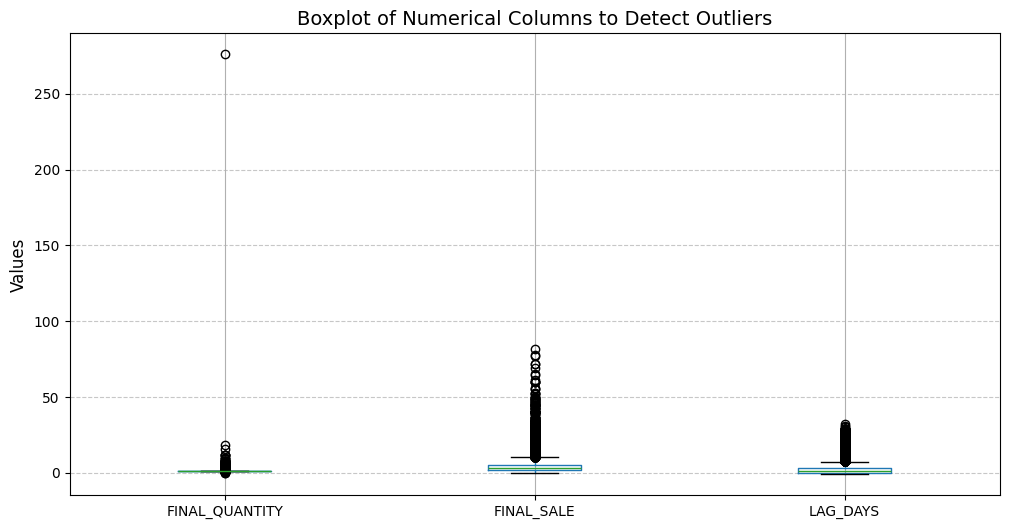

In [26]:
# Ensure PURCHASE_DATE and SCAN_DATE are datetime objects and timezone-naive
cleaned_transactions['PURCHASE_DATE'] = pd.to_datetime(cleaned_transactions['PURCHASE_DATE'], errors='coerce').dt.tz_localize(None)
cleaned_transactions['SCAN_DATE'] = pd.to_datetime(cleaned_transactions['SCAN_DATE'], errors='coerce').dt.tz_localize(None)

# Calculate LAG_DAYS between SCAN_DATE and PURCHASE_DATE
cleaned_transactions['LAG_DAYS'] = (cleaned_transactions['SCAN_DATE'] - cleaned_transactions['PURCHASE_DATE']).dt.days

# Detecting outliers using boxplots for numerical columns
numerical_columns = ['FINAL_QUANTITY', 'FINAL_SALE', 'LAG_DAYS']

# Create boxplots to visually inspect outliers
plt.figure(figsize=(12, 6))
cleaned_transactions[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Columns to Detect Outliers', fontsize=14)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The highest value in FINAL_QUANTITY seems to be anamolous so we will drop this. I assume based on this entry's FINAL_SALE that is should be quantity of 1, but with no knowledge of the data acquisition process, we will drop it. Further aggregation on Products, could inform whether the range for a FINAL_SALE is reasonable considering other instances of this product. "Unreasonable" FINAL_SALEs could be flagged as needing review.

Let's remake our boxplot so we have a cleaner version

In [27]:
# Identify the entry with the highest FINAL_QUANTITY value  
max_final_quantity = cleaned_transactions['FINAL_QUANTITY'].max()

# Drop the entry with the highest FINAL_QUANTITY
cleaned_transactions = cleaned_transactions[cleaned_transactions['FINAL_QUANTITY'] != max_final_quantity]

# Confirm the row is removed
print(f"Entry with FINAL_QUANTITY = {max_final_quantity} has been removed.")


Entry with FINAL_QUANTITY = 276.0 has been removed.


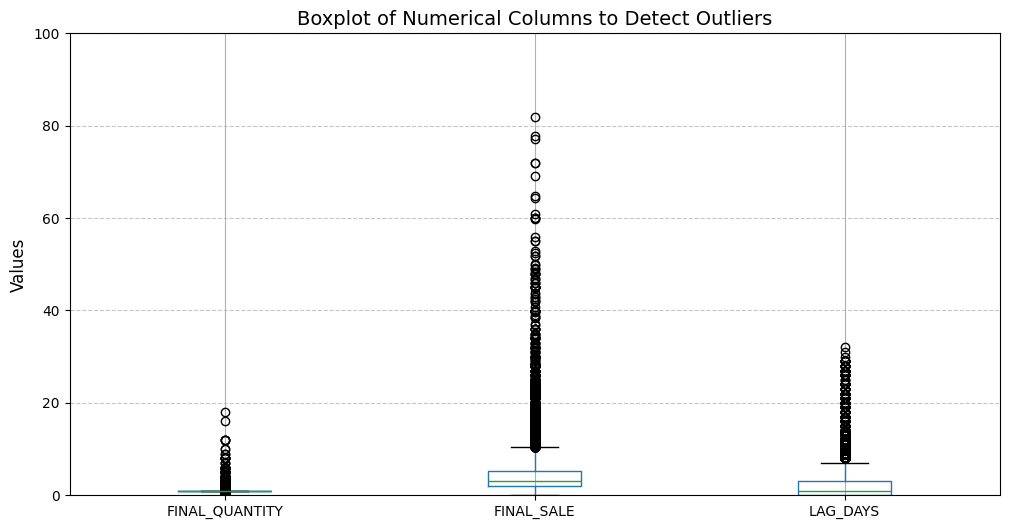

In [28]:
# Create boxplots to visually inspect outliers
plt.figure(figsize=(12, 6))
cleaned_transactions[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Columns to Detect Outliers', fontsize=14)
plt.ylabel('Values', fontsize=12)
plt.ylim(0,100)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





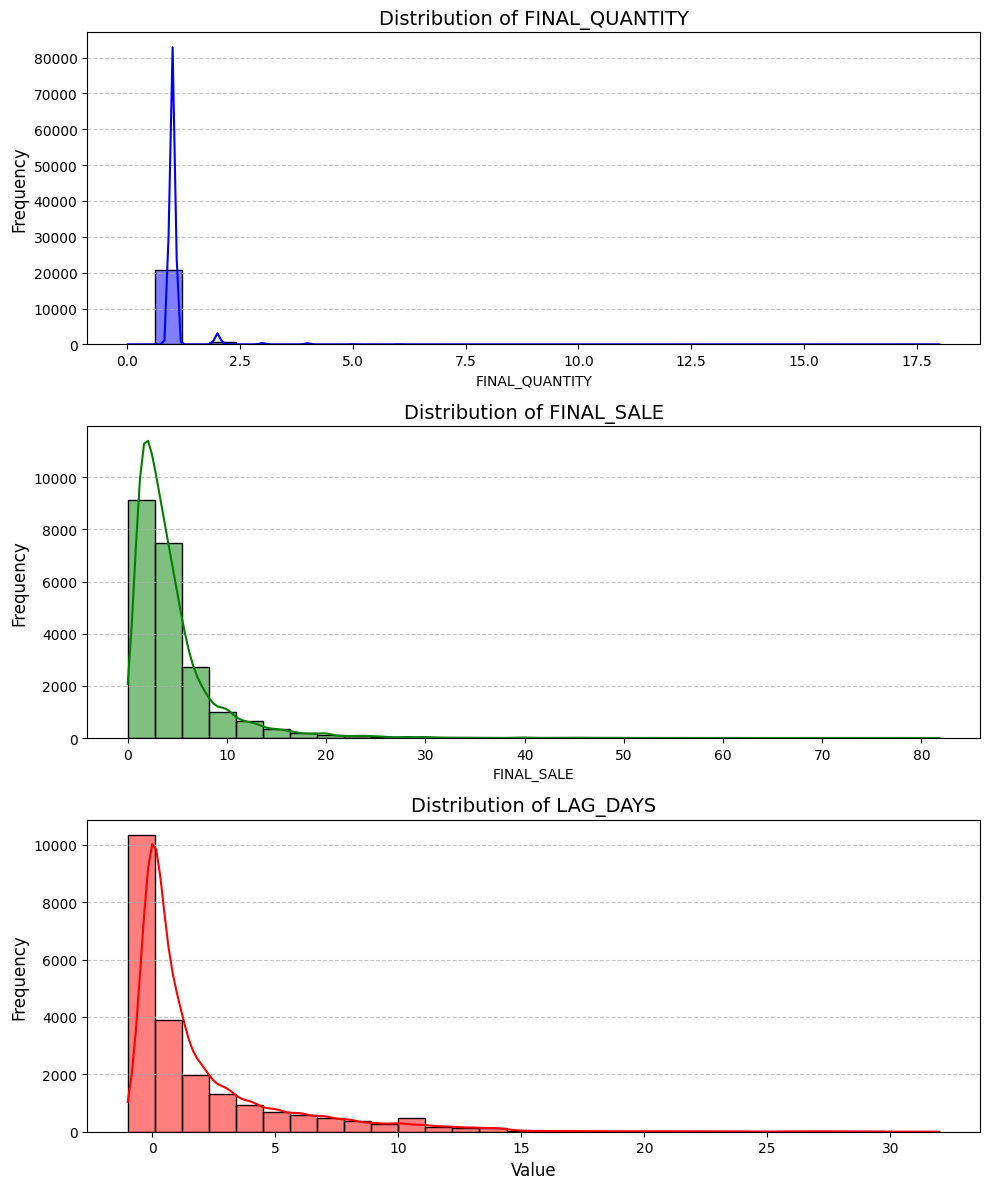

In [29]:
import seaborn as sns
# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=False)

# Plot distribution of FINAL_QUANTITY
sns.histplot(cleaned_transactions['FINAL_QUANTITY'], bins=30, kde=True, ax=axes[0], color='blue', edgecolor='k')
axes[0].set_title('Distribution of FINAL_QUANTITY', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot distribution of FINAL_SALE
sns.histplot(cleaned_transactions['FINAL_SALE'], bins=30, kde=True, ax=axes[1], color='green', edgecolor='k')
axes[1].set_title('Distribution of FINAL_SALE', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot distribution of LAG_DAYS
sns.histplot(cleaned_transactions['LAG_DAYS'], bins=30, kde=True, ax=axes[2], color='red', edgecolor='k')
axes[2].set_title('Distribution of LAG_DAYS', fontsize=14)
axes[2].set_xlabel('Value', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)


# Adjust layout
plt.tight_layout()
plt.show()

The three distrbutions follow similarly shaped distributions with high postive skew. Interestingly, there is a small, yet distinct bump in LAG_DAYS on the 10th day. This makes me question whether there are some groups of users who typically wait to scan their receipts.

### Additional Visualizations

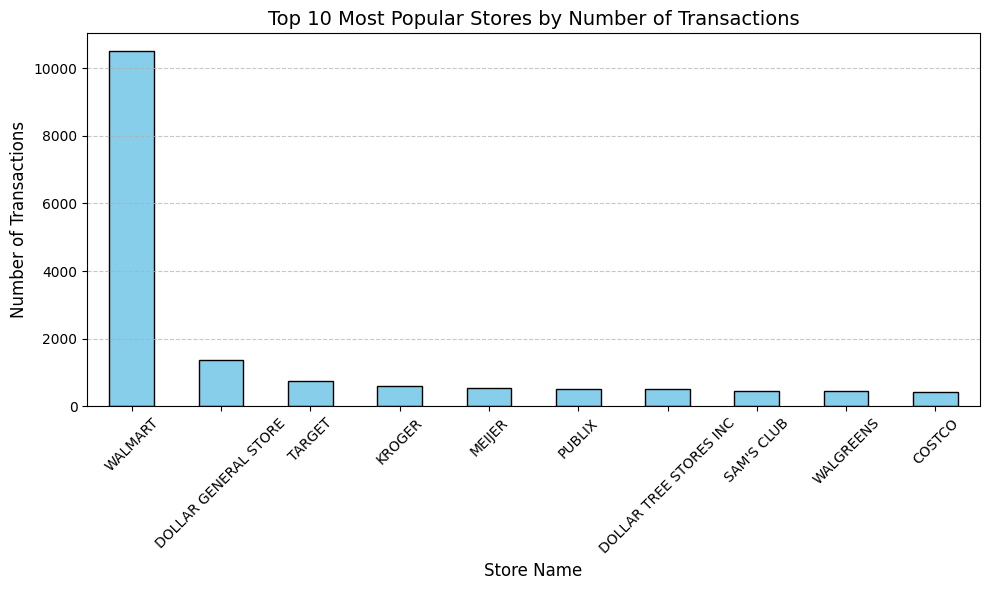

In [30]:
# Transactions per STORE_NAME (Top 10 Most Popular Stores)
transactions_by_store = cleaned_transactions['STORE_NAME'].value_counts().head(10)
plt.figure(figsize=(10, 6))
transactions_by_store.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Top 10 Most Popular Stores by Number of Transactions', fontsize=14)
plt.xlabel('Store Name', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

By far, the most popular store in Transactions is Walmart, accounting for approximately 50% of all transactions. 

<Figure size 1000x600 with 0 Axes>

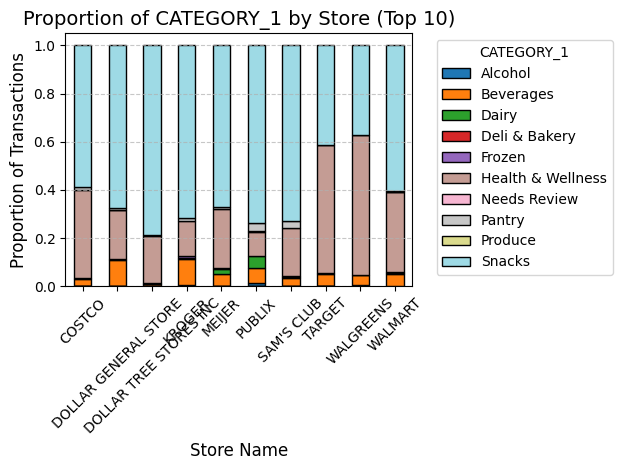

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge transactions with products using BARCODE as the key 
merged_data = pd.merge(cleaned_transactions, Products, on='BARCODE', how='left')

# Get the top 10 stores by transaction count
top_stores = cleaned_transactions['STORE_NAME'].value_counts().head(10).index
# Filter the merged data to only include transactions from these stores
merged_top = merged_data[merged_data['STORE_NAME'].isin(top_stores)]

# Group by STORE_NAME and CATEGORY_1 and count the transactions
store_category_counts = merged_top.groupby(['STORE_NAME', 'CATEGORY_1']).size().reset_index(name='count')

# Pivot the data so that each row is a store and each column is a CATEGORY_1
store_category_pivot = store_category_counts.pivot(index='STORE_NAME', columns='CATEGORY_1', values='count').fillna(0)

# Convert counts to proportions (each row sums to 1)
store_category_prop = store_category_pivot.div(store_category_pivot.sum(axis=1), axis=0)

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
store_category_prop.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='k')
plt.title('Proportion of CATEGORY_1 by Store (Top 10)', fontsize=14)
plt.xlabel('Store Name', fontsize=12)
plt.ylabel('Proportion of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='CATEGORY_1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


We can see most of the Transactions belonging to the Top 10 Stores belong to the category of Snacks, with the exception of Target and Walgreens. This is an interesting contrast to what we saw earlier where a majority of the Products belonged to Health & Wellness.

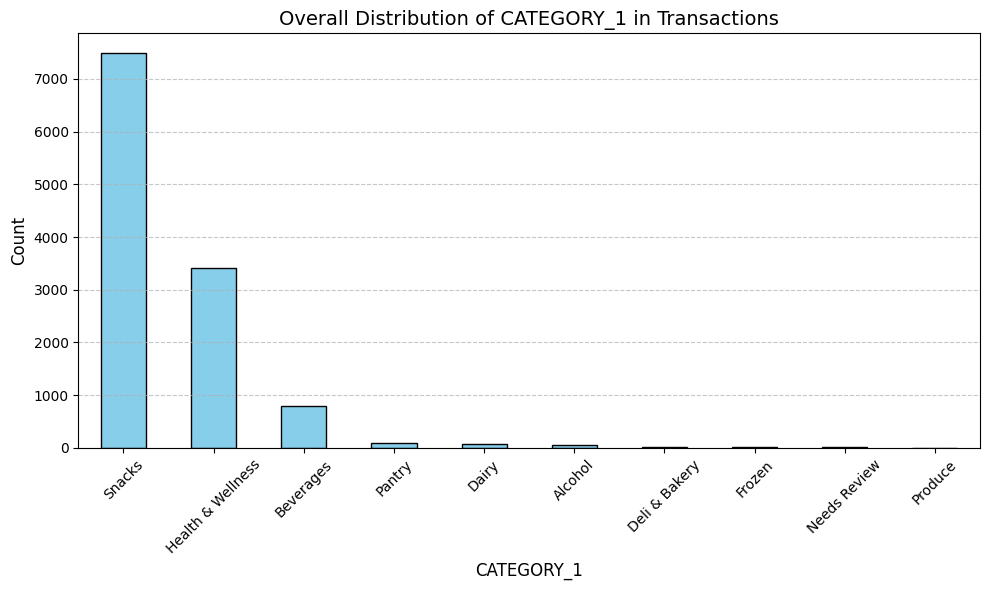

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge transactions with products using BARCODE as the key
merged_data = pd.merge(cleaned_transactions, Products, on='BARCODE', how='left')

# Compute the distribution (count) of CATEGORY_1 in the merged dataset
category_distribution = merged_data['CATEGORY_1'].value_counts()

# Plot the distribution as a bar chart 
plt.figure(figsize=(10, 6))
category_distribution.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Overall Distribution of CATEGORY_1 in Transactions', fontsize=14)
plt.xlabel('CATEGORY_1', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The plot above shows that the theme of Snacks being a popular category in Transactions is not only in the Top 10 Stores, but is a dominating theme regardless of Store. Additionally it should also be include that ~45% of all Transactions BARCODEs are non-existant in Products.This is concerning as it removes opportunity for analyzing customer habits. Again this could be attributed to the selection of data provided for the takehome, where as a full dataset would give comprehensive information hopefully.

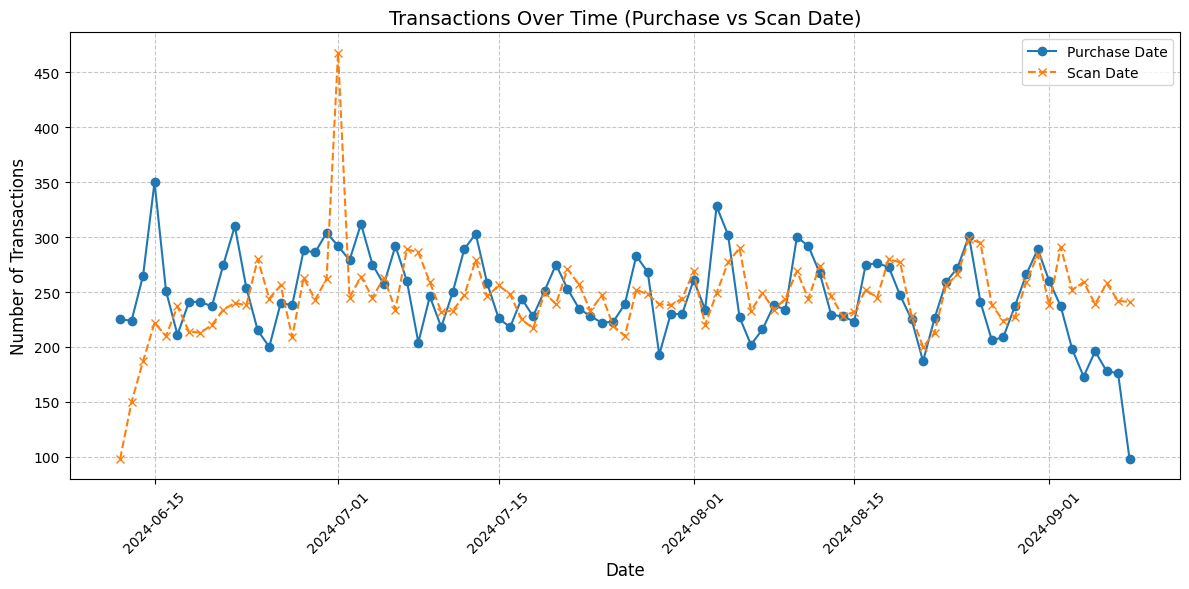

In [33]:
# Calculate transactions per day for both PURCHASE_DATE and SCAN_DATE
transactions_by_purchase_date = cleaned_transactions.groupby(cleaned_transactions['PURCHASE_DATE'].dt.date).size()
transactions_by_scan_date = cleaned_transactions.groupby(cleaned_transactions['SCAN_DATE'].dt.date).size()

# Overlay the time series of PURCHASE_DATE and SCAN_DATE
plt.figure(figsize=(12, 6))
plt.plot(transactions_by_purchase_date.index, transactions_by_purchase_date.values, label='Purchase Date', marker='o', linestyle='-')
plt.plot(transactions_by_scan_date.index, transactions_by_scan_date.values, label='Scan Date', marker='x', linestyle='--')
plt.title('Transactions Over Time (Purchase vs Scan Date)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Here we can see the data spans a 90 day period, where both time-series plots of Purchase and Scan counts remain relatively stationary. There is a very noticeable spike in Scan date on July 1st. Given our data it is probably hard to deduce what this spike is or could be, but my best guess would be some promotion or deadline encouraging users to Scan their receipts.

## Users

### Overview

In [34]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [35]:
# Coerce 'CREATED_DATE' & 'BIRTH_DATE' to datetime
Users['CREATED_DATE'] = pd.to_datetime(Users['CREATED_DATE'])
Users['BIRTH_DATE'] = pd.to_datetime(Users['BIRTH_DATE'])

This is now consistent with the given Entity Relationship Model.

### Missing Data

ID, and CREATED_DATE have no missing data, which is to be expected given this should be available from our signup processes. Due to the ease of coercion, we will assume BIRTH_DATE & CREATED_DATE are fine, and inspect later through distributions.

In [36]:
# Identify States present in Users
print(f'States represented in Users: \n{Users['STATE'].unique()}')

# Calculate Number of States Present
print(f'Number of States Represented: {Users['STATE'].nunique()}')

# Number of nan values in STATE
print(f'Number of NaN values in STATE: {Users['STATE'].isnull().sum()}')

States represented in Users: 
['CA' 'PA' 'FL' 'NC' 'NY' 'IN' nan 'OH' 'TX' 'NM' 'PR' 'CO' 'AZ' 'RI' 'MO'
 'NJ' 'MA' 'TN' 'LA' 'NH' 'WI' 'IA' 'GA' 'VA' 'DC' 'KY' 'SC' 'MN' 'WV'
 'DE' 'MI' 'IL' 'MS' 'WA' 'KS' 'CT' 'OR' 'UT' 'MD' 'OK' 'NE' 'NV' 'AL'
 'AK' 'AR' 'HI' 'ME' 'ND' 'ID' 'WY' 'MT' 'SD' 'VT']
Number of States Represented: 52
Number of NaN values in STATE: 4812


Of course, there are only 50 States, but this also includes DC and Puerto Rico. Let's take a look at the distribution of state representation.

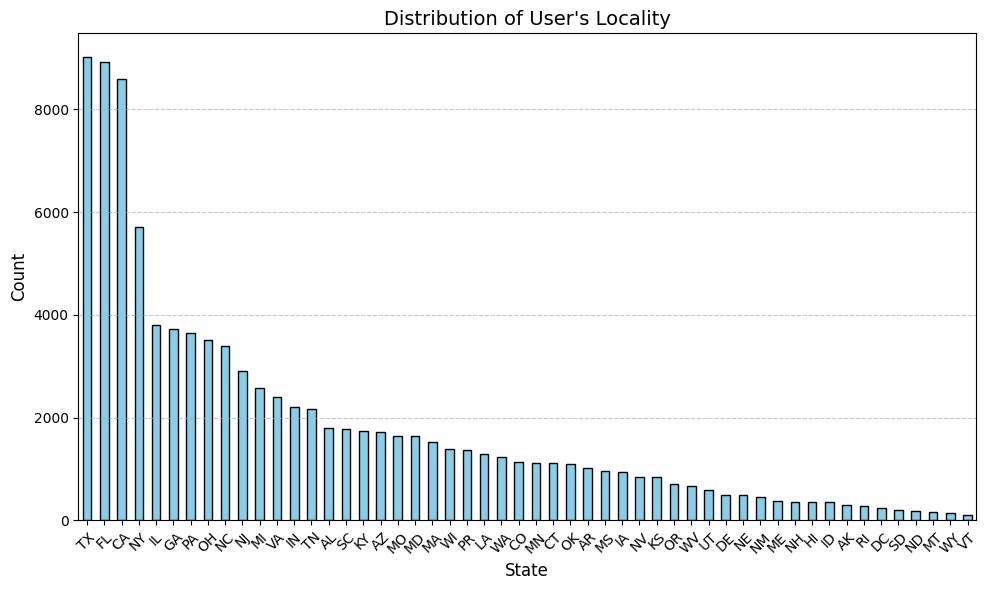

In [37]:
# Histogram of STATES in Users
plt.figure(figsize=(10, 6))
Users['STATE'].value_counts().plot(kind='bar', color='skyblue', edgecolor='k')
plt.title("Distribution of User's Locality", fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

For the most part, this distribution makes sense, especially in the context of State population. We may be able to gain some insight from comparing this distribution to the State's population.

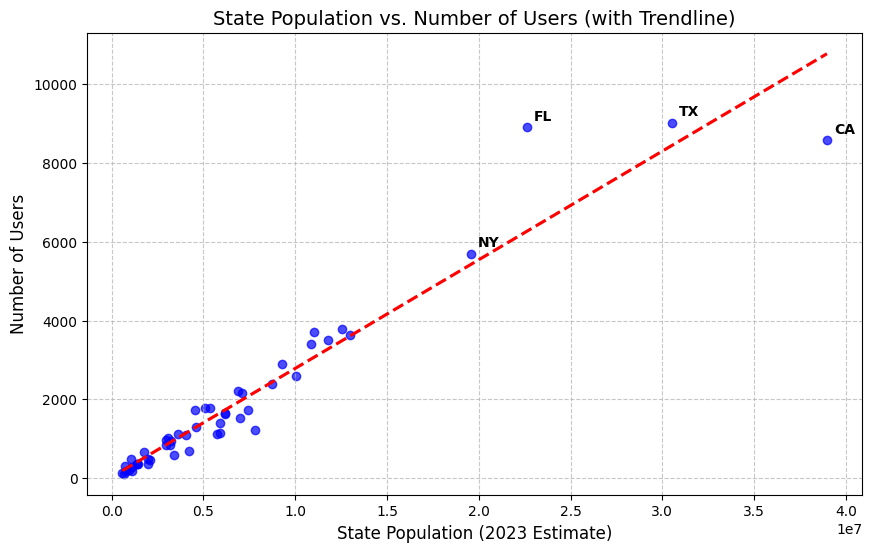

In [38]:
import seaborn as sns
# State population estimates for 2023 from Britannica
state_population = pd.DataFrame({
    "STATE": ["CA", "TX", "FL", "NY", "PA", "IL", "OH", "GA", "NC", "MI", "NJ", "VA", "WA", "AZ", "TN", "MA", "IN", "MO",
              "MD", "WI", "CO", "MN", "SC", "AL", "LA", "KY", "OR", "OK", "CT", "UT", "IA", "NV", "AR", "KS", "MS", "NM", 
              "NE", "ID", "WV", "HI", "NH", "ME", "MT", "RI", "DE", "SD", "ND", "AK", "VT", "WY"],
    "POPULATION_2023_EST": [38965193, 30503301, 22610726, 19571216, 12961683, 12549689, 11785935, 11029227, 10835491, 
                             10037261, 9290841, 8715698, 7812880, 7431344, 7126489, 7001399, 6862199, 6196156, 6180253, 
                             5910955, 5877610, 5737915, 5373555, 5108468, 4573749, 4526154, 4233358, 4053824, 3617176, 
                             3417734, 3207004, 3194176, 3067732, 2940546, 2939690, 2114371, 1978379, 1964726, 1770071, 
                             1435138, 1402054, 1395722, 1132812, 1095962, 1031890, 919318, 783926, 733406, 647464, 584057]
})

# Count number of users per state
user_counts = Users['STATE'].value_counts().reset_index()
user_counts.columns = ["STATE", "USER_COUNT"]

# Merge user data with population data
state_comparison = pd.merge(user_counts, state_population, on="STATE", how="left")

# Ensure no missing population data
state_comparison.dropna(inplace=True)

# Scatter plot with trendline
plt.figure(figsize=(10, 6))
sns.regplot(x=state_comparison["POPULATION_2023_EST"], y=state_comparison["USER_COUNT"], scatter_kws={'alpha':0.7, 'color':'blue'}, line_kws={'color':'red', 'linestyle':'--'}, ci=None)

# Identify the top 4 states by user count
top_states = state_comparison.nlargest(4, "USER_COUNT")

# Annotate top 4 states
for _, row in top_states.iterrows():
    plt.annotate(row["STATE"], (row["POPULATION_2023_EST"], row["USER_COUNT"]), textcoords="offset points", xytext=(5,5), ha='left', fontsize=10, fontweight='bold', color='black')

# Add labels and grid
plt.title("State Population vs. Number of Users (with Trendline)", fontsize=14)
plt.xlabel("State Population (2023 Estimate)", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()


The distribution of number of users per state is approximately proportional to state population (Britannica). Interestingly, we can see CA is ~2000 users below the linear trendline. This may indicate an untapped market or potential for analysis.

[Text(0, 0, '6089'), Text(0, 0, '63403')]

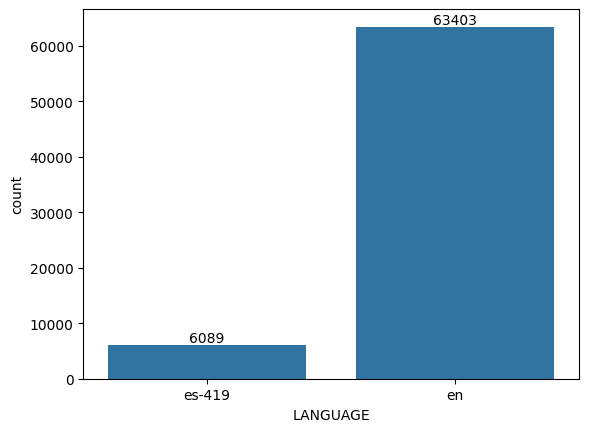

In [39]:
ax= sns.countplot(Users, x = 'LANGUAGE')
ax.bar_label(ax.containers[0])

We can see the primary language in this data is English, followed by Spanish. Interestingly there are no other language options, with a large number of missing values, this may indicate that we should be receptive to other languages. Because our customer population is in the United States, we can assume English and Spanish are the primary languages that require support.

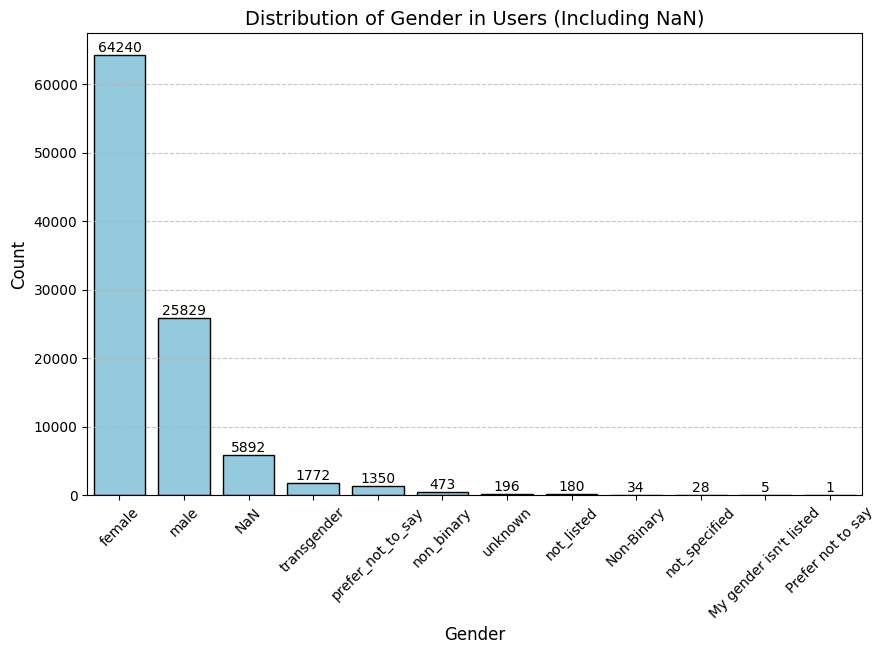

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure NaN values are explicitly counted
Users['GENDER'] = Users['GENDER'].fillna('NaN')  # Convert NaN to string for visualization

# Create count plot
plt.figure(figsize=(10, 6))
px = sns.countplot(data=Users, x='GENDER', order=Users['GENDER'].value_counts().index, color='skyblue', edgecolor='k')

# Add count labels on bars
px.bar_label(px.containers[0])

# Adjust x-axis labels for readability
px.tick_params(axis='x', rotation=45)

# Add title and labels
plt.title("Distribution of Gender in Users (Including NaN)", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


It is important to make our user's feel valued, therefore we will be sensitive to their preferred Gender identification such as 'female', 'male', 'non_binary', 'Non-Binary', 'transgender', 'not_listed', & 'My gender isn't listed'. These we will leave relatively untouched with the exception of 'non_binary' & 'Non-Binary' as they can be consolidated into one group. We will also consolidate 'My gender isn't listed' & 'not_listed'. Other Gender labels such as 'prefer_not_to_say', 'unknown', 'not_specified', and 'Prefer not to say' have some opportunity for consolidation as some are repetitive.

The changes that will be made are:
1. 'non_binary' & 'Non-Binary' consolidation
2. 'prefer_not_to_say' & 'Prefer not to say' consolidation to 'not_specified'
3. 'not_listed' &  'My gender isn't listed' consolidation
4. 'unknown' & 'not_specified' consolidation
5. ensure consistent formatting amongst all labels (i.e. no capitalization, seperation using underscores, etc.)

Additionally, I will not explicitly handle NaNs through removal, as I am unsure how these values appeared in the data.

In [41]:
# Define mapping for consolidation
gender_mapping = {
    'Non-Binary': 'non_binary',
    'prefer_not_to_say': 'not_specified',
    'Prefer not to say': 'not_specified',
    'not_listed': 'not_listed',
    "My gender isn't listed": 'not_listed',
    'unknown': 'not_specified',
    'not_specified': 'not_specified'
}
# Standardize gender labels

Users['GENDER'] = Users['GENDER'].replace(gender_mapping)  # Apply mapping
# Display unique values after changes
print("Updated Gender Categories:", Users['GENDER'].unique())

Updated Gender Categories: ['female' 'NaN' 'male' 'non_binary' 'transgender' 'not_specified'
 'not_listed']


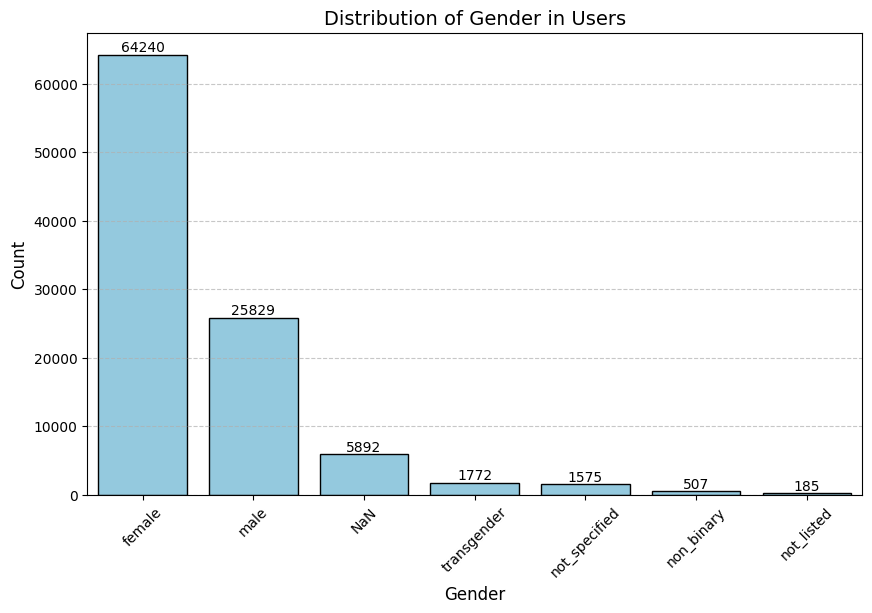

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure NaN values are explicitly counted
Users['GENDER'] = Users['GENDER'].fillna('NaN')  # Convert NaN to string for visualization

# Create count plot
plt.figure(figsize=(10, 6))
px = sns.countplot(data=Users, x='GENDER', order=Users['GENDER'].value_counts().index, color='skyblue', edgecolor='k')

# Add count labels on bars
px.bar_label(px.containers[0])

# Adjust x-axis labels for readability
px.tick_params(axis='x', rotation=45)

# Add title and labels
plt.title("Distribution of Gender in Users", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


We can see a large proportion of Users are female, this may or may not be represntative of the overall userbase. 

There are two assumptions of this data:
1. This is truly representative of the overall userbase
    * We can see most of our users are female and maybe we could either bolster current users usage  rates by catering to this population's consumer patterns.
    * Additionally under this same assumption we can try attracting more male users by analyzing their uses and draws of the app.
2. This is not representative of the overall userbase and may be tied to the specific products featured in the given takehome dataset.
    * If this is the case, we can state that this distribution is representative of the userbase that primarily buys Health & Wellness and Snacks products. This could be dug into deeper, but would require across the three datasets.
  
Without sufficient information I will assume the latter.


Next we can look at User Birth dates and account creation dates.

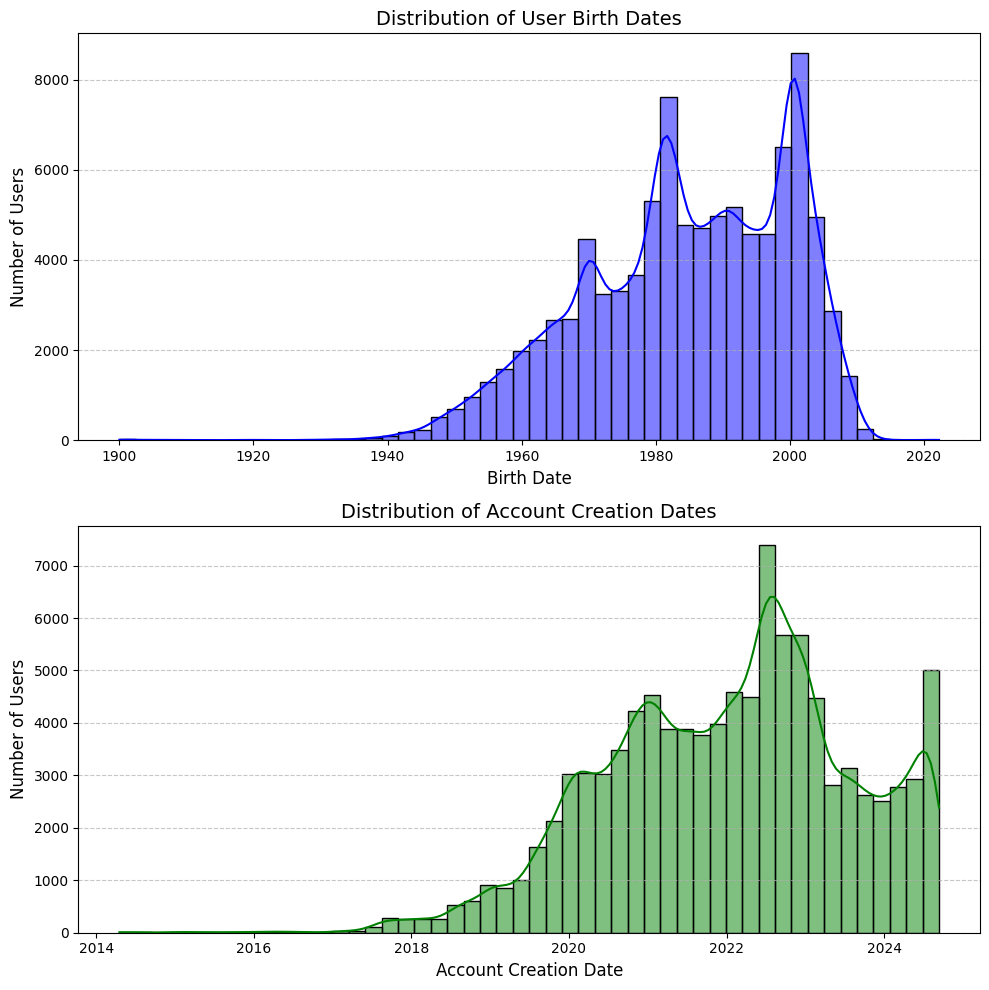

In [43]:

# Create subplots for BIRTH_DATE and CREATED_DATE distributions
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
# Plot BIRTH_DATE distribution
sns.histplot(Users['BIRTH_DATE'], bins=50, kde=True, color='blue', edgecolor='k', ax=axes[0])
axes[0].set_title("Distribution of User Birth Dates", fontsize=14)
axes[0].set_xlabel("Birth Date", fontsize=12)
axes[0].set_ylabel("Number of Users", fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
# Plot CREATED_DATE distribution
sns.histplot(Users['CREATED_DATE'], bins=50, kde=True, color='green', edgecolor='k', ax=axes[1])
axes[1].set_title("Distribution of Account Creation Dates", fontsize=14)
axes[1].set_xlabel("Account Creation Date", fontsize=12)
axes[1].set_ylabel("Number of Users", fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
# Adjust layout and show plot
plt.tight_layout()
plt.show()

Interestingly we see that there are 3 large peaks in Birth Dates, this could indicate groups of users that may have similar shopping patterns or interests in the app. It would be insightful to look at their transaction history and analyze these age groups.

For account creation dates, we see some large peaks, particularly in 2021, late-2022 to 2023 and in the most recent months of this data. Without additional information, these peaks could be due to incentive or advertisement programs during these periods. This could be another area for analysis with further information.

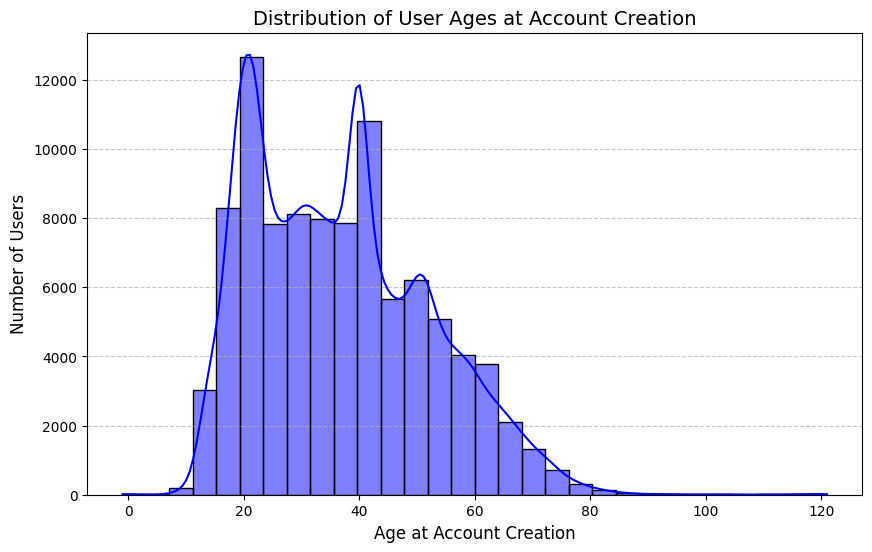

In [44]:
# Calculate age at account creation
Users['AGE_AT_CREATION'] = (Users['CREATED_DATE'] - Users['BIRTH_DATE']).dt.days // 365
# Drop NaN values (invalid/missing dates)
valid_ages_at_creation = Users['AGE_AT_CREATION'].dropna()
# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(valid_ages_at_creation, bins=30, kde=True, color='blue', edgecolor='k')
# Labels and formatting
plt.title("Distribution of User Ages at Account Creation", fontsize=14)
plt.xlabel("Age at Account Creation", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show plot
plt.show()

This should be a slightly mirrored version of BIRTH_DATE but may not be entirely consistent.

After taking a look at the BIRTH_DATE, CREATION_DATE, and User Ages at Creation, there are some concerning values.

In [45]:
Users.describe()

,AGE_AT_CREATION
count,96325.000000
mean,36.822133
std,15.180904
min,-1.000000
25%,23.000000
50%,36.000000
75%,47.000000
max,121.000000


There are some extreme outliers in the age of users at the time of account creation, indicating that the account creation/settings may need some tweaking. Of course numerous values ranging from -1 to 10 for user age should be concerning, with the addition of some questionable ages up to 121 years old. There are numerous users who are underage, without any information of the Terms of Service I might recommend that the ToS be reviewed to ensure that these underage users are allowed to use the Fetch Rewards App.


## Summary

Summarizing our findings there are 3 main data quality issues that I'd like to highlight, these will be listed in highest severity to least. Again, this list is not the definiteive list of issues, for more in depth please refer to the above analysis.

1. **Transactions Duplicates:**
   In the provided Transactions dataset, approximately 50% of the data are duplicates with inconsistent FINAL_QUANTITY and FINAL_SALE data types than the expected numeric. This is relatively simple to address through cleaning, but this should be communicated to our data engineers to ensure that these duplicates are resolved.
2.  **Limited Matching Data:**
   Across the three provided datasets, only about 100 out of 50,000 transactions can be connected to their pertinent information in Users and Products. This makes any inference on demographic trends difficult. For example it might be interesting to see what the large cluster of Users in the 40-45 buy, giving some insight into their motivators for downloading the app, which we could cater to.
3.  **Data Standardization:**
   In the analysis, we encountered several inconsistencies such as data types such as FINAL_SALE and FINAL_QUANTITY and various naming conventions and placeholders in fields such as GENDER, MANUFACTURER, AND BRAND. These inconsistencies hinder data integration, merging, and downstream analyses, emphasizing a need for thorough cleaning and adoption of consistent standards across data sources.


# Exercise 1: Key Question 2.

Q: Are there any fields that are challenging to understand?

A: Without proper documentation of the data, as analysts we will always make subconcious assumptions about what the fields indicate, especially if there is any ambiguity. 

Seperated by dataset, the fields that were challenging to understand were:
1. **Products**
   * **BARCODE/Duplicates:** As noted previously, there are many identical entries and duplicate BARCODEs. Without domain knowledge, I believe a fair assumption would be that a barcode is unique.
   * **MANUFACTURER/BRAND:** This columns is relatively straightforward with the exception of various placeholders for unknown value such as "PLACEHOLDER MANUFACTURER", "BRAND NOT KNOWN", etc. It is not immediately obvious how this is different from a missing value.
   * **Misc:** There are some products that have inconsistent information accross an entry. For example there is an entry with the Manufacturer 'Proctor & Gamble' Branded 'Bounty', these are paper towels, but these are labeled as chocolate. Additionally Keurig Dr. Pepper manufactures a wide range of products, including Vehicle Fluids, which also seems erroneous but is hard to confirm.
2. **Transactions**
   * **FINAL_QUANTITY:** I will forgo discussing the extensive issues we cleaned, but the term "FINAL_QUANTITY" is ambiguous on why it needs to be FINAL_QUANTITY vs. QUANTITY. Additionally, there is no information provided on whether this is a blanket variable for weight, count, etc.
   * **FINAL_SALE:** This is especially confusing in the FINAL_SALE vs. SALE debacle as FINAL might indicate it is the total saleprice for the store visit, where after looking at the multiple entries on each receipt, we know this is not the case. This should instead just be SALEPRICE, PRICE, or SALE. There are also some entries with 0.00 are difficult to understand, especially hindered by the column name ambiguity.
3. **Users**
   * None notable.

# Exercise 2

Before addressing the questions listed, I would like to point out the lack of data supplied to answer many of the questions that require aggregating on all three of the datasets.

In [46]:
# Check if Transactions can be joined with Users
transactions_users_merge = cleaned_transactions.merge(Users, left_on="USER_ID", right_on="ID", how="left", indicator=True)

# Check if Transactions can be joined with Products
transactions_products_merge = cleaned_transactions.merge(Products, on="BARCODE", how="left", indicator=True)

# Count missing joins
missing_users = transactions_users_merge['_merge'].value_counts()
missing_products = transactions_products_merge['_merge'].value_counts()

# Display results
missing_data_summary = pd.DataFrame({
    "Join Type": ["Transactions with Users", "Transactions with Products"],
    "Both Matched": [missing_users.get("both", 0), missing_products.get("both", 0)],
    "Missing Right Table": [missing_users.get("left_only", 0), missing_products.get("left_only", 0)],
    "Missing Left Table": [missing_users.get("right_only", 0), missing_products.get("right_only", 0)]
})

print(missing_data_summary)

                    Join Type  Both Matched  Missing Right Table  \
0     Transactions with Users           119                21803   
1  Transactions with Products         12305                 9619   

   Missing Left Table  
0                   0  
1                   0  


In [47]:
# Merge Transactions with Users
transactions_users = cleaned_transactions.merge(Users, left_on="USER_ID", right_on="ID", how="inner")
# Merge the result with Products
full_merge = transactions_users.merge(Products, on="BARCODE", how="inner")
# Count the number of observations in the fully merged dataset
merged_observations_count = full_merge.shape[0]
# Display the result
print(f"Total number of observations after merging all three datasets: {merged_observations_count}")

Total number of observations after merging all three datasets: 72


As we can see we are left with a very small number of traceable observations that include product, user, and transaction data that can be connected. I assume that in the full database, all or most of the pertinent information will be available and this will not be an issue.

In addition to this, we should also make it clear that for this analysis, the data is only a subset of the total Fetch Rewards data. This has certain implications due to sampling, exact queries, etc. which introducing inherent bias.

For this reason, I will note that in the questions that require all three datasets to be used to derive an answer will not be accurate given the limitations of the data, however the SQL query will be correct.

## Close-ended Question

What are the top 5 brands by receipts scanned among users 21 and over?

In [ ]:
from sqlalchemy import create_engine
# Create a connection to the database
engine = create_engine('sqlite:///takehome.db', echo=False)

# Write DataFrames to SQL
Products.to_sql('Products', con=engine, if_exists='replace', index=False)
cleaned_transactions.to_sql('Transactions', con=engine, if_exists='replace', index=False)
Users.to_sql('Users', con=engine, if_exists='replace', index=False)

In [152]:
query = """
        SELECT brand,
               COUNT(*) AS brand_counts
          FROM Transactions t
          INNER JOIN Users u
            ON t.user_id = u.id
          INNER JOIN Products p
            ON t.barcode = p.barcode
         WHERE DATE(birth_date, '+21 years') <= t.purchase_date
         AND brand IS NOT NULL
         GROUP BY brand
         ORDER BY brand_counts DESC
         LIMIT 5;
"""

Brands_21Plus_top5 = pd.read_sql(query, engine)
Brands_21Plus_top5.head(10)

,BRAND,brand_counts
0,NERDS CANDY,3
1,DOVE,3
2,TRIDENT,2
3,SOUR PATCH KIDS,2
4,MEIJER,2


The above query should return the top 5 brands for users 21 and over, but in this case there are some ties for the top 5. For the sake of answering the question the above query is accurate, but with the understanding of our data, it would be more accurate to addresss the ties between the Brands as follow. Additionally, due to the limited amount of matching data for our analysis, I would be hesitant to draw conclusions from these results, although they may be decent but inaccurate estimators for trends. If provided better data, this caveat would be minimized.

In [153]:
query = """
        SELECT brand,
               COUNT(*) AS brand_counts
          FROM Transactions t
          INNER JOIN Users u
            ON t.user_id = u.id
          INNER JOIN Products p
            ON t.barcode = p.barcode
         WHERE DATE(birth_date, '+21 years') <= t.purchase_date
         AND brand IS NOT NULL
         GROUP BY brand
         ORDER BY brand_counts DESC;
"""

Brands_21Plus = pd.read_sql(query, engine)
Brands_21Plus.head(10)

,BRAND,brand_counts
0,NERDS CANDY,3
1,DOVE,3
2,TRIDENT,2
3,SOUR PATCH KIDS,2
4,MEIJER,2
5,HERSHEY'S,2
6,GREAT VALUE,2
7,COCA-COLA,2
8,UTZ,1
9,TWIX,1


C:\Users\19152\AppData\Local\Temp\ipykernel_20756\4124724199.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Brands_21Plus.head(n=10), x='brand_counts', y='BRAND', palette='viridis')


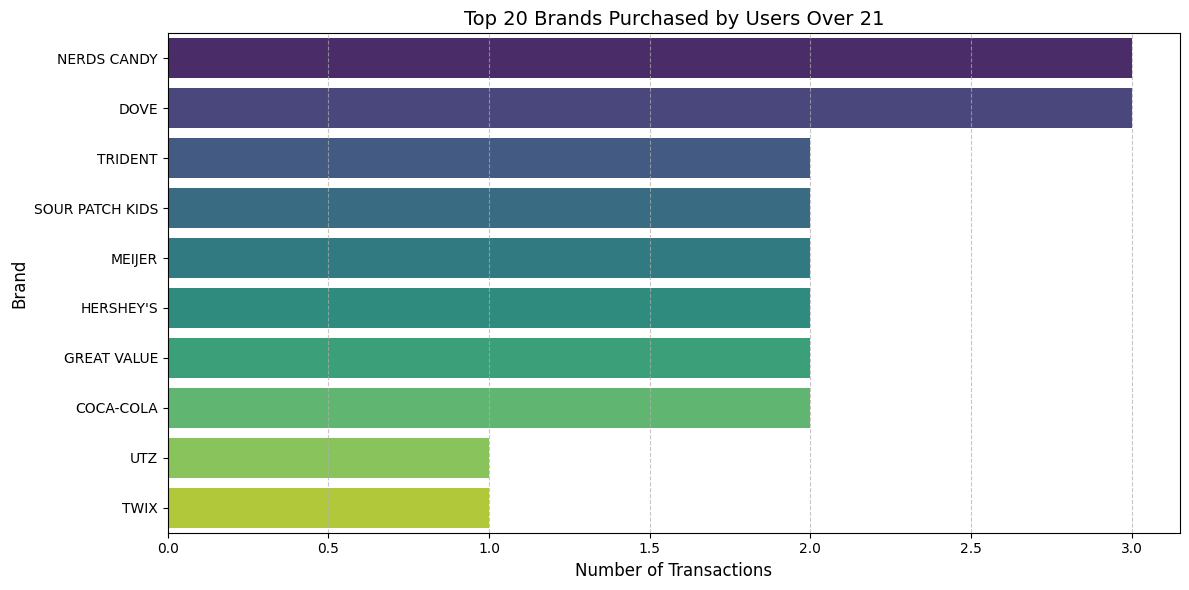

In [154]:
# Plot Brands_21Plus
plt.figure(figsize=(12, 6))
sns.barplot(data=Brands_21Plus.head(n=10), x='brand_counts', y='BRAND', palette='viridis')
plt.title('Top 20 Brands Purchased by Users Over 21', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()



Here we see there is a tie between NERDS CANDY and DOVE for FIRST/SECOND PLACE, with TRIDENT, SOUR PATCH KIDS, MEJIER, HERSHEY'S, GREAT VALUE, and COCA-COLA tied for 3rd-8th.

## Open-ended Questions

Questions:
1. Who are Fetch's power users?
2. At what percent has Fetch grown year over year?




## Power Users

Supported by multiple sources, app retention rate is key performance indicator of app success. With Fetch's business platform it is important to maintain a relationship with Users such that they will consistently utilize the app. For this reason, we will opt for a metric that not only incentivizes high usage, but also consistent usage. This takes into consideration the limitations of the 90-day period we were provided, as users with the most records may also be users who have recently downloaded the app and forgot to ever use the app again. We want to identify and incentivize users who are consistent as their Customer Lifetime Valuation (CLV) would be remarkably higher. For the sake of retaining the most data, as joining the tables drastically reduces our amount of data, I will try to minimize joining across the datasets. If the data did not have this issue, I would then use this to the fullest by also incorporating information such as CREATED_DATE.

### Explanation of Retention Metrics

In our analysis, we evaluate user engagement over a 90-day period by combining two aspects of user activity: the frequency of transactions and the spread of those transactions over time.

- **Active Days**: This measures the number of different days on which a user made at least one transaction. It reflects how often the user interacts with the app.

- **Span Days**: This represents the period between a user's first and last transaction, including both dates. It indicates how widely the user's activity is spread over the entire period.

To assess overall retention, we first calculate two rates:
1. **Active Rate**: This is the fraction of the 90 days on which the user was active.
2. **Coverage Rate**: This shows how much of the 90-day period is covered by the user's activity—from their first transaction to their last.

We then combine these two rates by multiplying them together to obtain a single retention metric. The idea is that a user who transacts on many different days (a high active rate) and whose activity spans a large portion of the 90 days (a high coverage rate) is more consistently engaged. Conversely, a user who is only active on a few days or whose transactions are all clustered in a short period will have a lower retention metric.

This combined metric helps us identify users who are not only frequent transactors but also spread their activity over time, which is a strong indicator of consistent usage and potentially higher lifetime value.


In [185]:
sql_query = """
WITH user_activity AS (
    SELECT
        user_id,
        COUNT(DISTINCT DATE(purchase_date)) AS active_days,
        MIN(DATE(purchase_date)) AS first_date,
        MAX(DATE(purchase_date)) AS last_date
    FROM Transactions
    GROUP BY user_id
)
SELECT
    user_id,
    active_days,
    first_date,
    last_date,
    JULIANDAY(last_date) - JULIANDAY(first_date) + 1 AS span_days,
    ROUND(active_days / 90.0, 2) AS active_rate,
    ROUND((JULIANDAY(last_date) - JULIANDAY(first_date) + 1) / 90.0, 4) AS coverage_rate,
    ROUND((active_days / 90.0) * ((JULIANDAY(last_date) - JULIANDAY(first_date) + 1) / 90.0), 4) AS retention_metric
FROM user_activity
ORDER BY retention_metric DESC, active_days DESC;
"""

user_retention = pd.read_sql(sql_query, engine)


In [186]:
user_retention

,user_id,active_days,first_date,last_date,span_days,active_rate,coverage_rate,retention_metric
0,64063c8880552327897186a5,9,2024-06-26,2024-09-05,72.0,0.10,0.8000,0.0800
1,6327a07aca87b39d76e03864,6,2024-06-20,2024-09-01,74.0,0.07,0.8222,0.0548
2,630120aa2f095fa437267570,5,2024-06-14,2024-09-07,86.0,0.06,0.9556,0.0531
3,653ec447a225ea102b7f0846,5,2024-06-13,2024-09-05,85.0,0.06,0.9444,0.0525
4,60a5363facc00d347abadc8e,5,2024-06-17,2024-09-06,82.0,0.06,0.9111,0.0506
...,...,...,...,...,...,...,...,...
16023,6682d51586cc41b000ce6400,1,2024-08-17,2024-08-17,1.0,0.01,0.0111,0.0001
16024,6682d56d465f309038ae1a1b,1,2024-06-30,2024-06-30,1.0,0.01,0.0111,0.0001
16025,6682d75b86cc41b000ce646f,1,2024-06-21,2024-06-21,1.0,0.01,0.0111,0.0001
16026,6682d8f2465f309038ae1aca,1,2024-09-08,2024-09-08,1.0,0.01,0.0111,0.0001


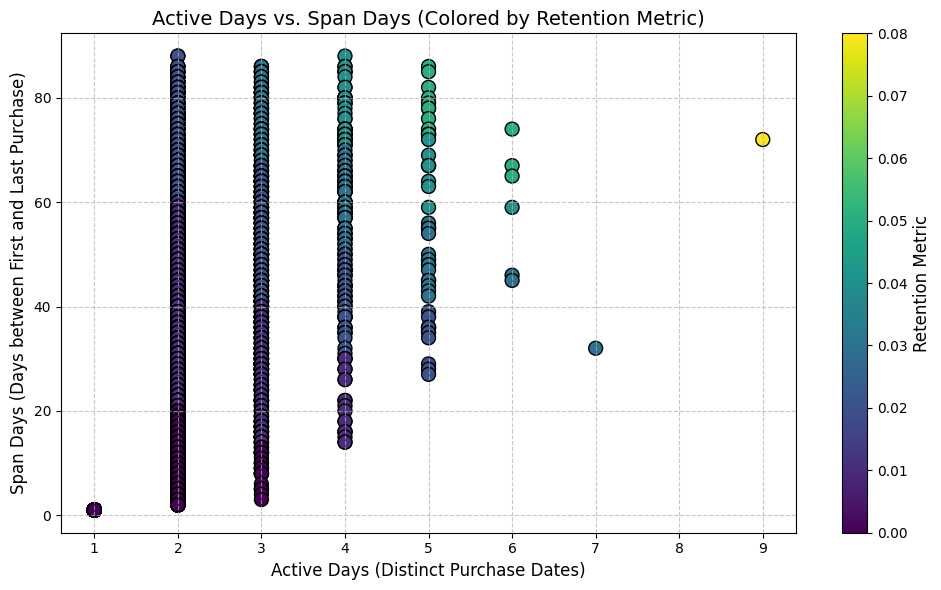

In [ ]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(user_retention['active_days'], user_retention['span_days'], c=yoy_growth['retention_metric'], cmap='viridis', s=100, edgecolor='black')
plt.title("Active Days vs. Span Days (Colored by Retention Metric)", fontsize=14)
plt.xlabel("Active Days (Distinct Purchase Dates)", fontsize=12)
plt.ylabel("Span Days (Days between First and Last Purchase)", fontsize=12)
cbar = plt.colorbar(sc)
cbar.set_label("Retention Metric", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Now we can see that we have properly segmented the users through the retention metric, again incentivizing consistent transactions and high usage. Now let's segment this further by finding the top 5% of users.

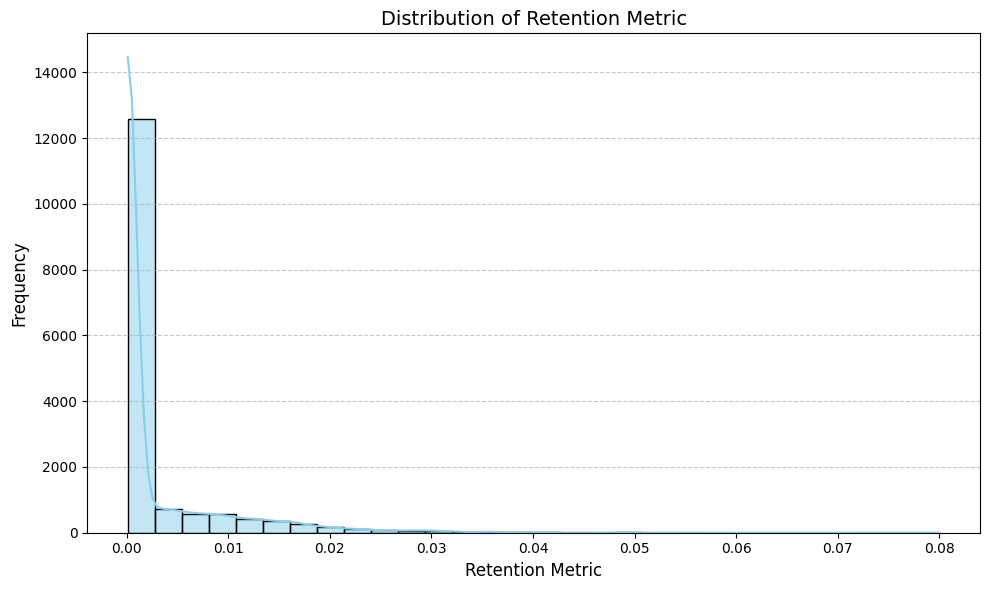

In [197]:
# Retention Metric Distribution
plt.figure(figsize=(10, 6))
sns.histplot(user_retention['retention_metric'], bins=30, kde=True, color='skyblue', edgecolor='k')
plt.title("Distribution of Retention Metric", fontsize=14)
plt.xlabel("Retention Metric", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [188]:
user_retention.head(n=10)

,user_id,active_days,first_date,last_date,span_days,active_rate,coverage_rate,retention_metric
0,64063c8880552327897186a5,9,2024-06-26,2024-09-05,72.0,0.10,0.8000,0.0800
1,6327a07aca87b39d76e03864,6,2024-06-20,2024-09-01,74.0,0.07,0.8222,0.0548
2,630120aa2f095fa437267570,5,2024-06-14,2024-09-07,86.0,0.06,0.9556,0.0531
3,653ec447a225ea102b7f0846,5,2024-06-13,2024-09-05,85.0,0.06,0.9444,0.0525
4,60a5363facc00d347abadc8e,5,2024-06-17,2024-09-06,82.0,0.06,0.9111,0.0506
5,6682cbf6465f309038ae1888,6,2024-06-24,2024-08-29,67.0,0.07,0.7444,0.0496
6,6111e2c79e2fce4b36b7de0b,5,2024-06-20,2024-09-07,80.0,0.06,0.8889,0.0494
7,62e6f1ce48cc274645652f44,5,2024-06-21,2024-09-07,79.0,0.06,0.8778,0.0488
8,5eb59d6be7012d13941af5e2,6,2024-06-14,2024-08-17,65.0,0.07,0.7222,0.0481
9,60e63c03934e791d9e42cc65,5,2024-06-15,2024-08-31,78.0,0.06,0.8667,0.0481


This retention metric now highlights users who have high Customer Lifetime Valuation. We can identify the users with a high retention metric as **Power Users**. This can be especially insightful for future analyses including understanding behaviors of these users.

C:\Users\19152\AppData\Local\Temp\ipykernel_20756\1993027964.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=active_days_distribution, x='active_days', y='percent_users', palette='viridis')


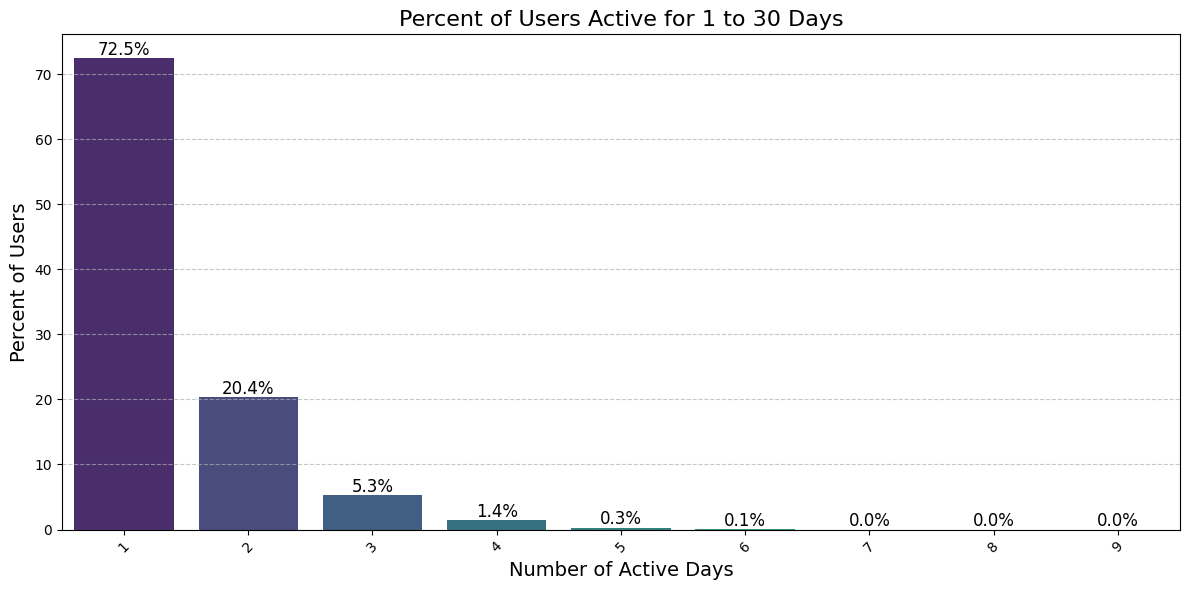

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of distinct active days per user
user_active_days = Transactions.groupby('USER_ID')['PURCHASE_DATE'].apply(
    lambda dates: dates.dt.date.nunique()
).reset_index(name='active_days')

# Calculate the distribution of active_days across users
active_days_distribution = user_active_days['active_days'].value_counts().reset_index()
active_days_distribution.columns = ['active_days', 'num_users']
active_days_distribution = active_days_distribution.sort_values('active_days')

# Calculate the total number of users
total_users = user_active_days['USER_ID'].nunique()

# Calculate the percentage of users for each active_days value
active_days_distribution['percent_users'] = (active_days_distribution['num_users'] / total_users) * 100

# Restrict the data to active days from 1 to 30
active_days_distribution = active_days_distribution[
    (active_days_distribution['active_days'] >= 1) & (active_days_distribution['active_days'] <= 30)
]

# Plot the distribution with percentage labels on top
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=active_days_distribution, x='active_days', y='percent_users', palette='viridis')
plt.title('Percent of Users Active for 1 to 30 Days', fontsize=16)
plt.xlabel('Number of Active Days', fontsize=14)
plt.ylabel('Percent of Users', fontsize=14)

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., 
        height + 0.5, 
        '{:1.1f}%'.format(height), 
        ha="center", 
        fontsize=12
    )

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Going hand in hand with this, a staggering 72.5% of Users listed in Transactions only use the app for 1 day in the 90 day period, implying an extremely high churn rate.

## Fetch YoY Growth

The only YoY data we have access to is Users Created_Date, this is severely limiting for this analysis as given my previous solution, highlighting the high percent of customer churn, indicated sheer number of users creating accounts may not be a good metric.

Solutions:
1. Use Revenue or another financial indicator.
2. Relate users in transactions to their Users entries to identify number of users who still use the app.
3. Make strong assumptions to equate account creations per year to growth.


After searching for external data on Fetch Rewards including open records such as SEC EDGAR financial filings, Stocks, etc. there is limited external data.

An additional opportunity would be to identify number of users still active per created_date year, but due to the sparse number of connections and the few number of still active users, makes it impossible. 

With this in mind, we will make the assumption that the proportion of users who remain consistently using the app stays the same through each year. With this assumption we can use CREATED_DATE as a metric.


There are two ways to look at this growth, one being raw counts and the second being percentage increase. Both serve their own purpose, but first I will show raw counts as they are simpler to understand, followed by the percentage to see what years had drastic increase relative to the previous year.

    CREATED_YEAR  total_users
0           2014           30
1           2015           51
2           2016           70
3           2017          644
4           2018         2168
5           2019         7093
6           2020        16883
7           2021        19159
8           2022        26807
9           2023        15464
10          2024        11631


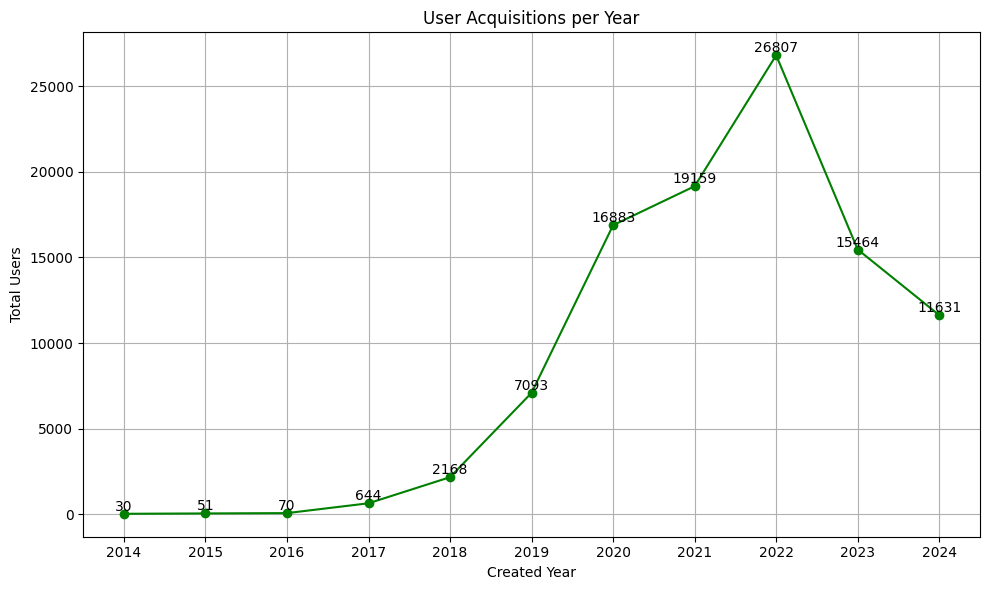

In [214]:
sql_query = """
SELECT 
  strftime('%Y', created_date) AS CREATED_YEAR, 
  COUNT(*) AS total_users
FROM users
GROUP BY CREATED_YEAR
ORDER BY CREATED_YEAR;
"""

# Execute the query and load the results into a pandas DataFrame.
user_counts = pd.read_sql_query(sql_query, engine)

# Convert the CREATED_YEAR column to numeric if necessary (ensuring proper ordering).
user_counts['CREATED_YEAR'] = pd.to_numeric(user_counts['CREATED_YEAR'], errors='coerce')

# Print the DataFrame to inspect the data.
print(user_counts)

# Create the plot for total user counts per created year.
plt.figure(figsize=(10, 6))
plt.plot(user_counts['CREATED_YEAR'], user_counts['total_users'],
         marker='o', linestyle='-', color='green')

# Annotate each point with the user count
for year, count in zip(user_counts['CREATED_YEAR'], user_counts['total_users']):
    plt.text(year, count, f"{count}", fontsize=10, ha='center', va='bottom')

plt.xlabel('Created Year')
plt.ylabel('Total Users')
plt.title('User Acquisitions per Year')
plt.grid(True)
plt.xticks(user_counts['CREATED_YEAR'])  # Ensure x-axis ticks match the years
plt.tight_layout()
plt.show()


This plot clearly shows an upward trend in user account creations over time, culminating in a dramatic surge in 2022. The sheer volume of new users in 2022 suggests strong market demand and possibly the successful impact of recent initiatives or favorable external conditions. However, it's important to note that while the absolute numbers in 2022 are impressive, the plot doesn't capture the relative increases in previous years that might have been significant on their own.

Additionally, the data reveals that after the peak in 2022, the user acquisition numbers begin to decline in 2023 and 2024. This decrease could indicate a shift in market conditions, a potential saturation of the user base, or the impact of changes in strategy. The drop-off in these later years suggests that the surge in 2022 may not be part of a continuing growth trend, but rather a temporary peak.

Overall, while the plot highlights a large increase in users—especially in 2022—it also raises questions about the sustainability of that growth, given the subsequent decline in 2023 and 2024. Understanding these dynamics is crucial for identifying whether the 2022 spike was a one-off event or if adjustments in strategy are needed to regain momentum.

In [208]:
sql_query = """
WITH yearly_users AS (
  SELECT
    strftime('%Y', created_date) AS CREATED_YEAR,
    COUNT(*) AS total_users
  FROM users
  GROUP BY CREATED_YEAR
)
SELECT
  CREATED_YEAR,
  total_users,
  LAG(total_users) OVER (ORDER BY CREATED_YEAR) AS previous_year_users,
  CASE 
    WHEN LAG(total_users) OVER (ORDER BY CREATED_YEAR) IS NULL THEN NULL
    ELSE ROUND(
         ((total_users - LAG(total_users) OVER (ORDER BY CREATED_YEAR)) * 100.0
          / LAG(total_users) OVER (ORDER BY CREATED_YEAR)), 2)
  END AS yoy_growth_percentage
FROM yearly_users
ORDER BY CREATED_YEAR;
"""
yoy_growth = pd.read_sql(sql_query, engine)


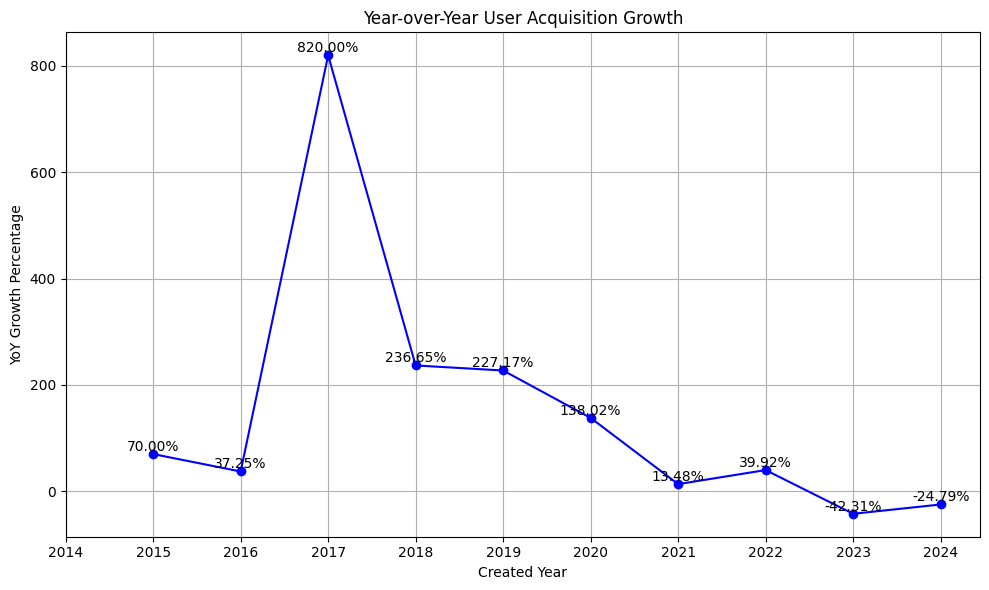

In [212]:

plt.figure(figsize=(10, 6))
plt.plot(yoy_growth['CREATED_YEAR'], yoy_growth['yoy_growth_percentage'], marker='o', linestyle='-', color='b')

# Annotate each point with its YoY percentage value
for x, y in zip(yoy_growth['CREATED_YEAR'], yoy_growth['yoy_growth_percentage']):
    if pd.notnull(y):
        plt.text(x, y, f"{y:.2f}%", fontsize=10, ha='center', va='bottom')

plt.xlabel('Created Year')
plt.ylabel('YoY Growth Percentage')
plt.title('Year-over-Year User Acquisition Growth')
plt.grid(True)
plt.xticks(yoy_growth['CREATED_YEAR'])  
plt.tight_layout()
plt.show()


The percentage plot shows an exceptionally high YoY growth rate in 2017. This dramatic uptick suggests that the strategies implemented during that year—whether a major marketing campaign, product enhancement, or other external factors—resulted in a significant increase in new account creations relative to 2016. However, given that percentage growth can be sensitive to low initial numbers, it's important to verify whether this spike is also reflected in absolute terms. Additionally, while 2017 stands out, the following years seem to stabilize, indicating that the dramatic growth might have been a one-time event or the result of specific conditions that may not be repeated. This raises questions about the sustainability of such growth and suggests that a closer look at both the strategies employed in 2017 and the underlying market conditions could provide valuable insights for future planning.

# Exercise 3

**Subject:** Action Required: Addressing Data Quality & Enhancing User Engagement Strategies

Hi [Stakeholder Name],

I hope you’re doing well. I’m writing to share key findings from our recent analysis of the Fetch Rewards Transactions data and to propose actionable next steps to improve user retention and overall data integrity.

---

### Key Data Quality Issues & Outstanding Questions

- **Duplicate Transaction Records:**  
  We observed duplicate transaction entries where each receipt appears twice—with one record often containing erroneous data. Although these are most likely not duplicate scans of individual items, this redundancy is concerning from a data processing standpoint.  
  *Outstanding Question:* Can we verify whether this duplication is intentional (e.g., for backup or additional metadata) or if it results from an error in data ingestion?

- **Limited Data Matching:**  
  Only a small fraction of transactions can be fully connected across the Users, Transactions, and Products databases. This limitation hinders a comprehensive understanding of customer behavior.  
  *Outstanding Question:* Is this dataset a representative sample of the full database, or are there integration issues that need to be addressed?

- **Field Ambiguities:**  
  Some fields—especially in Transactions (e.g., `FINAL_QUANTITY`, `FINAL_SALE`) and in Products (e.g., placeholders like `PLACEHOLDER_MANUFACTURER`)—lack clear documentation. This ambiguity affects our ability to draw reliable insights.

---

### Interesting Trend & New Insight

Our analysis of user activity over a 90-day period has revealed two contrasting behaviors:

- **High Churn:**  
  A staggering **75%** of users engage with the app on only a single day, indicating a pattern of users utilizing the app once and then not returning. This high churn rate is concerning for long-term engagement and customer lifetime value. It suggests that many users might be signing up due to an initial incentive or curiosity but fail to find ongoing value in the app. Possible contributing factors include:
  - **Onboarding Experience:** Users may not be adequately guided through the app’s features during their first use, leading to confusion or lack of engagement.
  - **Insufficient Value Proposition:** The app might not be providing enough compelling benefits or unique features to encourage repeat visits.
  - **External Competition:** Users might be drawn to alternative platforms that offer better rewards or a more engaging experience.
  - **User Expectations:** There may be a disconnect between what users expect when they sign up and what the app delivers.
  
  Understanding the reasons behind this rapid drop-off is critical. It may require further user research—such as surveys or usability testing—to identify specific pain points and barriers to continued engagement. Addressing these issues could help lower the churn rate and improve the overall retention of new users.

- **High Retention Among Power Users:**  
  Conversely, a small segment of users exhibits a high retention metric, indicating sustained engagement and potentially high customer lifetime value. These "power users" are characterized by:
  - **Consistent Engagement:** They use the app regularly over an extended period, often returning week after week.
  - **High Transaction Volume:** Their activity spans many days, suggesting that they find continuous value in the app’s offerings.
  - **Valuable Insights:** Their behaviors can serve as a benchmark for best practices in user engagement. By analyzing what these users do—such as which features they use most frequently, how they interact with the rewards system, and what motivates their continued engagement—we can identify actionable strategies to encourage similar behavior in a broader user base.
  
  These power users offer a critical insight into what drives long-term app engagement. Their sustained use may be linked to a clear value proposition, effective in-app incentives, or a seamless user experience that others could benefit from. Leveraging these insights can help us develop targeted initiatives to convert one-time users into repeat, high-value customers.

---

### Recommendations & Call to Action

1. **Deepen Analysis on Power Users:**  
   We should further analyze the behaviors and motivations of our high-retention users. Understanding their engagement patterns can inform strategies to boost overall retention.

2. **Implement a Gamified Incentive Program:**  
   To counter the high churn rate and encourage consistent usage, I recommend:
   - **Usage Multiplier:** Introduce a reward points multiplier that increases based on consecutive weekly engagement.
   - **Leaderboard:** Launch a leaderboard to showcase top users, fostering competition and motivating consistent usage.

3. **Data Quality Clarifications:**  
   - **Technical Review:** Engage with the data engineering team to verify the cause and purpose of the duplicate transaction entries.
   - **Documentation Update:** Request detailed documentation for ambiguous fields (e.g., `FINAL_QUANTITY`, `FINAL_SALE`, and manufacturer placeholders) to ensure accurate interpretation.

---

Your guidance on these points is crucial. Please let me know when you’re available to discuss these recommendations further or if you can provide additional resources to help clarify these data issues.

Thank you for your time and support as we work toward enhancing our platform’s performance and user engagement.

Best regards,

Adam Miramontes Nguyen  
Data Analyst, Fetch Rewards  
[Contact Information]
